# WORKSHOP 2

------------

GRUPO 4:

Digital House


In [53]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df_raw = pd.read_csv('properatti.csv')
data = df_raw.copy()
data.head(2);

In [55]:
def nulos(data=data):
    result = data.isnull().sum().sort_values(ascending = False)
    return result

def nuloss(data=data):
    print ('>> DATOS NULOS:\n')
    display (data.isnull().sum().sort_values(ascending = False))
    return

def porcentaje_nulos(data=data):
    result = data.isnull().sum().sort_values(ascending = False)/data.shape[0] *100
    return result

def porcentaje_nuloss(data=data):
    print ('>> PORCENTAJE DE DATOS NULOS:\n')
    display( round(data.isnull().sum().sort_values(ascending = False)/data.shape[0] *100,2))
    return

def data_info(data, name='data'):
    ### DATA INFO 
    df = pd.DataFrame(pd.Series(data.columns))
    df.columns = ['columna']
    df.columns.name = f'df de {name}'
    df.index.name = 'index'
    df['Nan'] = data.isna().sum().values
    df['dtype']  = data.dtypes.values
    df['count'] = data.count().values
    df['pct_nan'] = round(df['Nan']/data.shape[0]*100,2)
    df['count_unique'] = [len(data[elemento].value_counts()) for elemento in data.columns]
    return df

df de data_cruda,columna,Nan,dtype,count,pct_nan,count_unique
index,,,,,,
0,Unnamed: 0,0,int64,121220,0.00,121220
1,operation,0,object,121220,0.00,1
2,property_type,0,object,121220,0.00,4
3,place_name,23,object,121197,0.02,1060
4,place_with_parent_names,0,object,121220,0.00,1164
5,country_name,0,object,121220,0.00,1
6,state_name,0,object,121220,0.00,28
7,geonames_id,18717,float64,102503,15.44,646
8,lat-lon,51550,object,69670,42.53,47203


<BarContainer object of 26 artists>

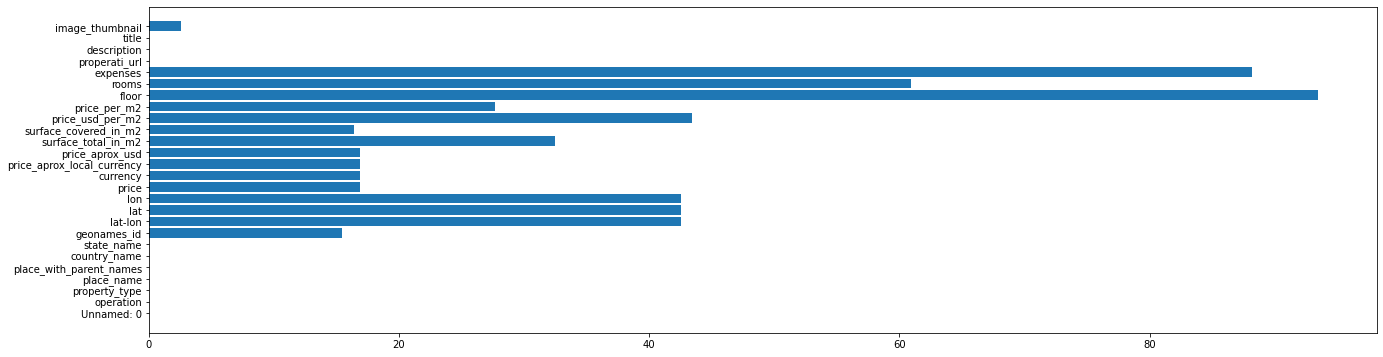

In [104]:
df = data_info(df_raw, 'data_cruda')
Dicto = {}
Dicto['df_raw'] = df.to_dict()
display (df)

#df = df.sort_values(by='pct_nan', ascending=False)


fig, ax = plt.subplots(figsize=(22, 6))
#grid
plt.barh(df.columna, df.pct_nan, label='porcentaje de NaN\'s')

# 1. LIMPIEZA PRELIMINAR DEL DATASET

--------------
**Columnas Redundantes**

----------

In [57]:
#print ('Tipos de operacion:\n{}'.format(data.operation.value_counts()),'\n\nPais de ubicacion del inmueble:\n{}'.format(data.country_name.value_counts()))
print ('dropiamos "operation" y "country_name" : 1 unique value')

dropiamos "operation" y "country_name" : 1 unique value


In [58]:
# LIMPIEZA POR COLUMNAS INNECESARIAS

# Columnas: Unnamed y geonames_id: no aportan al analisis
data.drop([data.columns[0],'geonames_id'], axis=1, inplace=True)

# Columnas: operation y country_name: son redundantes porque poseen un valor unico
data.drop(['operation', 'country_name'], axis=1, inplace=True)

print ('dropiamos "Unnamed: 0" y "geoname_id" : irrelevante')

dropiamos "Unnamed: 0" y "geoname_id" : irrelevante


----------
**Filas con nans**

--------------

In [59]:
# LIMPIEZA SEGUN CANTIDAD DE COLUMNAS NULAS POR ENTRADA
rows_null_values = data.isna().sum(axis=1)
#print ('Cantidad de columnas nulas por entradas:\n{}'.format(rows_null_values.value_counts(sort=False)))

mask_rows_null_values = rows_null_values < 9
print('\nCantidad de entradas que tienen 9 o más de 9 variables nulas: {}'.format(data.shape[0] - mask_rows_null_values.sum()))
print ('Porcentaje de entradas con exceso de variables nulas {}%'.format(round((data.shape[0] - mask_rows_null_values.sum())/data.shape[0]*100,2)))
print ('Dimension del nuevo dataframe: {}'.format(data[mask_rows_null_values].shape[0]))
print ('dropiamos 20340 filas : irrelevante')


Cantidad de entradas que tienen 9 o más de 9 variables nulas: 20340
Porcentaje de entradas con exceso de variables nulas 16.78%
Dimension del nuevo dataframe: 100880
dropiamos 20340 filas : irrelevante


In [60]:
data = data[mask_rows_null_values]
#print ('PORCENTAJE DE DATOS NULOS:\n',round(data.isna().sum()/data.shape[0]*100,2))

-----------------
**Analisis de place_name**

-------------

In [61]:
## PRIMER ANALISIS VER DE RESCATAR LOS 23 NANS DE PLACE_NAME
print ('Conteo de valores: data.place_with_parent_name / mascara: data.place_name.isna()')
print (data[data.place_name.isna()].place_with_parent_names.value_counts().to_string())
print ('Observacion:\n* Podemos observar que las 23 entradas faltantes corresponden a la localidad de "Tigre"')

Conteo de valores: data.place_with_parent_name / mascara: data.place_name.isna()
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Observacion:
* Podemos observar que las 23 entradas faltantes corresponden a la localidad de "Tigre"


In [62]:
data.place_name.fillna('Tigre', inplace=True)
data = data.drop(['place_with_parent_names', 'image_thumbnail'], axis=1)

C:\Users\Agustin\anaconda3.2\envs\dhdsblend2021\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
print ('CONTEO DE VALORES NULOS EN LAS PRIMERAS COLUMNAS:')
print (data.iloc[:,:3].isna().sum().to_string())
print ('Observacion:\n* 23 valores recuperados en la columna place_name\n* Tenemos 28 state_name y aprox 1000 place_name')
print ('* dropiamos place_with_parents_names : redundante')

CONTEO DE VALORES NULOS EN LAS PRIMERAS COLUMNAS:
property_type    0
place_name       0
state_name       0
Observacion:
* 23 valores recuperados en la columna place_name
* Tenemos 28 state_name y aprox 1000 place_name
* dropiamos place_with_parents_names : redundante


### CONCLUSION 1:

A partir del analisis de columnas, logramos reducir nuestro dataset. El criterio utilizado fue el de eliminar aquellas entradas que representen valores faltantes en exceso. 

El resumen obtenido en la reduccion de datos nulos es:

    - lat-lon, lat, lon = 4,68%    
    - price, currency, price_aprox's = 12,73%   
    - surface_total_in_m2 = 4,41%   
    - surface_covered_in_m2 = 6,88%   
    - price_usd_per_m2 = 11,19%   
    - price_per_m2 = 14,1%   
    - floor = 0,77%   
    - rooms = 3,88%   
    - expenses = 1,37%   



df de data limpieza_1,columna,Nan,dtype,count,pct_nan,count_unique
index,,,,,,
0,property_type,0,object,100880,0.00,4
1,place_name,0,object,100880,0.00,980
2,state_name,0,object,100880,0.00,28
3,lat-lon,38184,object,62696,37.85,42191
4,lat,38184,float64,62696,37.85,41554
5,lon,38184,float64,62696,37.85,41577
6,price,4148,float64,96732,4.11,9447
7,currency,4149,object,96731,4.11,2
8,price_aprox_local_currency,4148,float64,96732,4.11,10049


<BarContainer object of 20 artists>

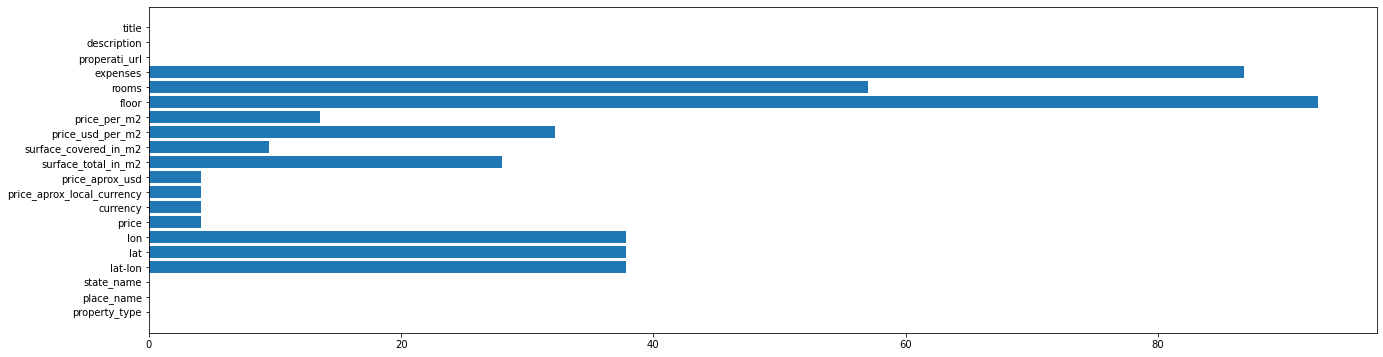

In [64]:
df = data_info(data, 'data limpieza_1')
display (df)

#df = df.sort_values(by='pct_nan', ascending=False)
fig, ax = plt.subplots(figsize=(22, 6))
plt.barh(df.columna, df.pct_nan, label='porcentaje de NaN\'s')

In [65]:
df = data_info(data, name='limpieza preliminar')
Dicto['limpieza_1'] = df.to_dict()
df = df.set_index('columna')
df

df de limpieza preliminar,Nan,dtype,count,pct_nan,count_unique
columna,,,,,
property_type,0,object,100880,0.00,4
place_name,0,object,100880,0.00,980
state_name,0,object,100880,0.00,28
lat-lon,38184,object,62696,37.85,42191
lat,38184,float64,62696,37.85,41554
lon,38184,float64,62696,37.85,41577
price,4148,float64,96732,4.11,9447
currency,4149,object,96731,4.11,2
price_aprox_local_currency,4148,float64,96732,4.11,10049


Cantidad de propiedades publicadas según su provincia/localidad


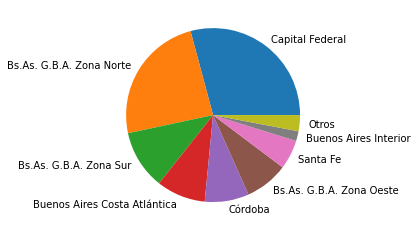

In [66]:
serie_aux = data.state_name.value_counts()
valores = serie_aux[:8].values.tolist()
valores.append(serie_aux[8:].sum())
valores

labels = serie_aux[:8].index.tolist()
labels.append('Otros')
labels

print ('Cantidad de propiedades publicadas según su provincia/localidad')
plt.pie(valores,labels=labels)
plt.show()

In [67]:
# puede ser util si se selecciona label_2 = una columna sin nans


# state_name tiene 28 valores unicos y es referido a la ubicacion así que haremos una primera division por ahí
#### FUNCIONA PERFECTAMENTE ESTA FUNCION PERO LA RAWEO PORQUE YA QUEDÓ DIVIDIDA ENTRE 3 FUNCIONES EN LA CELDA DE ABAJO

# cantidad de datos publicados
# cantidad de tipo apartment
# cantida de tipo house
# cantida de tipo ph
# cantidad de tipo store
# precio promedio y la mediana de precio para state_name, property_type
# dispersion de los precios

label_1 = 'state_name' # first_division
label_2 = 'properati_url' #notna label for count
label_4 = 'property_type' # first_iteration to set_check
label_5 = 'price_aprox_local_currency' #to compute medidas de resumen and dispersion

def data_explore(data, label_1, label_2, label_4, label_5):
    df = pd.DataFrame(index = pd.Series(data[label_1].unique()))
#cantidad de datos publicados
    df = df.join(data.groupby(label_1)[label_2].count())
    df.columns = ['total']
# cantidad de tipo apartment
    set_check = list(set(data[label_4]))
    for i,propiedad in enumerate(set_check):
        serie_check =data[data[label_4]==propiedad].groupby(label_1)[label_2].count()
        df['count_'+propiedad] = 0 + serie_check
# precio promedio y la mediana de precio para state_name, property_type
    data_check = data.groupby([label_1, label_4])[label_5].aggregate(['mean', 'std', 'median'])
    data_check.reset_index(inplace=True)
    data_check = data_check.pivot_table(index=label_1, columns=label_4)
    for propiedad in set_check:
        df[propiedad+'_price_mean'] = 0 + data_check.loc[:]['mean'][propiedad]
        df[propiedad+'_price_std'] = 0 + data_check.loc[:]['std'][propiedad]
        df[propiedad+'_price_median'] = 0 + data_check.loc[:]['median'][propiedad]
# dispersion de los precios
    for propiedad in set_check:
        df['CV_'+propiedad] = df[propiedad+'_std']/df[propiedad+'_mean']
    return df


In [68]:
label_1 = 'state_name' # first_division

def explore_count(data, label_1):
    df = pd.DataFrame(index = pd.Series(data[label_1].unique()))
    data['all_one'] = 1
#cantidad de datos publicados
    df = df.join(data.groupby(label_1)['all_one'].count())
    df.columns = ['total']
    data.drop('all_one', axis=1, inplace=True)
    return df


label_1 = 'state_name' # first_division
label_2 = 'property_type' # first_iteration to set_check
def explore_count_by(data,label_1, label_2, df):
# cantidad de tipo apartment
    set_check = list(set(data[label_2]))
    data['all_one'] = 1
    for i,propiedad in enumerate(set_check):
        serie_check =data[data[label_2]==propiedad].groupby(label_1)['all_one'].count()
        df['count_'+propiedad] = 0 + serie_check
    return df

label_1 = 'state_name' # first_division
label_2 = 'property_type' # first_iteration to set_check
label_3 = 'price_aprox_local_currency' #to compute medidas de resumen and dispersion
def explore_statics_count(data, label_1, label_2, label_3, df):
# precio promedio y la mediana de precio para state_name, property_type
    data_check = data.groupby([label_1, label_2])[label_3].aggregate(['mean', 'std', 'median'])
    data_check.reset_index(inplace=True)
    data_check = data_check.pivot_table(index=label_1, columns=label_2)
    set_check = list(set(data[label_2]))
    for propiedad in set_check:
        df[propiedad+'_mean_'+label_3] = 0 + data_check.loc[:]['mean'][propiedad]
        df[propiedad+'_std_'+label_3] = 0 + data_check.loc[:]['std'][propiedad]
        df[propiedad+'_median_'+label_3] = 0 + data_check.loc[:]['median'][propiedad]
# dispersion de los precios
    for propiedad in set_check:
        df['CV_'+propiedad+'_'+label_3] = df[propiedad+'_std_'+label_3]/df[propiedad+'_mean_'+label_3]
    return df


In [69]:
def explore_count(data, label_1):
    df = pd.DataFrame(index = pd.Series(data[label_1].unique()))
    data['all_one'] = 1
#cantidad de datos publicados
    df = df.join(data.groupby(label_1)['all_one'].count())
    df.columns = ['total']
    data.drop('all_one', axis=1, inplace=True)
    return df

def explore_count_by(data,label_1, label_2, df):
# cantidad de tipo apartment
    set_check = list(set(data[label_2]))
    data['all_one'] = 1
    for i,propiedad in enumerate(set_check):
        serie_check =data[data[label_2]==propiedad].groupby(label_1)['all_one'].count()
        df['count_'+propiedad] = 0 + serie_check
    return df

def explore_statics_count(data, label_1, label_2, label_3, df):
# precio promedio y la mediana de precio para state_name, property_type
    data_check = data.groupby([label_1, label_2])[label_3].aggregate(['mean', 'std', 'median'])
    data_check.reset_index(inplace=True)
    data_check = data_check.pivot_table(index=label_1, columns=label_2)
    set_check = list(set(data[label_2]))
    for propiedad in set_check:
        df[propiedad+'_mean_'+label_3] = 0 + data_check.loc[:]['mean'][propiedad]
        df[propiedad+'_std_'+label_3] = 0 + data_check.loc[:]['std'][propiedad]
        df[propiedad+'_median_'+label_3] = 0 + data_check.loc[:]['median'][propiedad]
# dispersion de los precios
    for propiedad in set_check:
        df['CV_'+propiedad+'_'+label_3] = df[propiedad+'_std_'+label_3]/df[propiedad+'_mean_'+label_3]
    return df

In [70]:
#pd.options.display.max_rows = 6

In [71]:
df = explore_count(data, 'state_name')

df = explore_count_by(data, 'state_name', 'property_type', df)

df.columns.name = 'Conteo de tipo de propiedad'

# original
display (df.sort_values(by='total', ascending=False).tail(7))

# primer drop
# se decide eliminar mirando sort_values(by='total') (+) a medida que implementamos los filtros de abajo algunas localidades se volvieron irrelevantes estadisticamente (+) analisis individual de estadisticos Entre Rios se volvio irrelevante (+) San Luis porque o es nan o tiene alta CV
drop_1_prop_type = ['La Rioja', 'Santiago Del Estero', 'San Juan', 'Jujuy', 'Santa Cruz', 'Catamarca', 'Formosa', 'Chubut', 'Chaco', 'La Pampa', 'Tierra Del Fuego', 'Entre Ríos', 'San Luis']
# porque estadisticamente son insignificantes.
df.loc[drop_1_prop_type] = 0
#display (df.sort_values(by='total', ascending=False).tail(7))
df = df.drop(drop_1_prop_type)
print ('el print está obsoleto porque a este drop se le añadieron localidades por exploracion correspondiente a celdas siguientes')
print ('='*40,'Fin modificacion 1','='*40,'\n')

# segundo drop
# se decide eliminar el valor de PH para el porcentaje de publicaciones menores a la vecindad del 4% y que tenga pocas publicaciones
df['pct_PH_total'] = round(df.count_PH / df.total *100,2)
drop_2_prop_type = 'PH', ['Río Negro', 'Buenos Aires Interior', 'Córdoba', 'Misiones', 'Santa Fe', 'Tucumán', 'Mendoza']
display (df[df.pct_PH_total < 3.75])
# porque el pct_es está fuera de la vecindad del 4% de datos, sumado a que son estadisiticamente irrelevante el total de propiedades publicadas
df.loc[df.pct_PH_total < 3.75, 'count_PH'] = 0
display (df[df.pct_PH_total < 3.75])
print ('='*40,'Fin modificacion 2','='*40, '\n')
df = df.drop('pct_PH_total', axis=1)

# tercer drop
# se decide eliminar los valores de stores para: valores menores a 20 publicaciones
display (df.loc[df.count_store < 20].sort_values(by='count_store', ascending=False))
drop_3_prop_type = 'store', ['Mendoza', 'Corrientes', 'Tucumán', 'Neuquén', 'Salta']
df.loc[df.count_store < 20, 'count_store'] = 0
display (df.loc[df.count_store < 20])
print ('='*40,'Fin modificacion 3','='*40, '\n')

print ('DataFrame_info listo: \n\tFALTA IMPLEMENTAR filtros a los df_statics')
display (df.sort_values(by='total', ascending=False))

Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house
Formosa,29,NaN,29.0,NaN,NaN
Catamarca,22,NaN,11.0,NaN,11.0
Santa Cruz,18,1.0,1.0,NaN,16.0
Jujuy,10,NaN,2.0,NaN,8.0
San Juan,8,NaN,4.0,NaN,4.0
Santiago Del Estero,3,NaN,1.0,NaN,2.0
La Rioja,2,NaN,NaN,NaN,2.0


el print está obsoleto porque a este drop se le añadieron localidades por exploracion correspondiente a celdas siguientes
======================================== Fin modificacion 1 ======================================== 



Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house,pct_PH_total
Santa Fe,5506,75.0,4440.0,36.0,955.0,0.65
Córdoba,8278,231.0,4552.0,162.0,3333.0,1.96
Misiones,395,5.0,152.0,4.0,234.0,1.01
Buenos Aires Interior,1837,44.0,714.0,44.0,1035.0,2.40
Río Negro,312,28.0,160.0,10.0,114.0,3.21
Mendoza,494,19.0,273.0,2.0,200.0,0.40
Tucumán,210,11.0,149.0,1.0,49.0,0.48


Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house,pct_PH_total
Santa Fe,5506,75.0,4440.0,0.0,955.0,0.65
Córdoba,8278,231.0,4552.0,0.0,3333.0,1.96
Misiones,395,5.0,152.0,0.0,234.0,1.01
Buenos Aires Interior,1837,44.0,714.0,0.0,1035.0,2.40
Río Negro,312,28.0,160.0,0.0,114.0,3.21
Mendoza,494,19.0,273.0,0.0,200.0,0.40
Tucumán,210,11.0,149.0,0.0,49.0,0.48


======================================== Fin modificacion 2 ======================================== 



Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house
Mendoza,494,19.0,273.0,0.0,200.0
Corrientes,439,11.0,124.0,53.0,251.0
Tucumán,210,11.0,149.0,0.0,49.0
Neuquén,368,7.0,171.0,88.0,102.0
Misiones,395,5.0,152.0,0.0,234.0
Salta,105,1.0,55.0,NaN,49.0


Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house
Misiones,395,0.0,152.0,0.0,234.0
Neuquén,368,0.0,171.0,88.0,102.0
Mendoza,494,0.0,273.0,0.0,200.0
Corrientes,439,0.0,124.0,53.0,251.0
Tucumán,210,0.0,149.0,0.0,49.0
Salta,105,0.0,55.0,NaN,49.0


======================================== Fin modificacion 3 ======================================== 

DataFrame_info listo: 
	FALTA IMPLEMENTAR filtros a los df_statics


Conteo de tipo de propiedad,total,count_store,count_apartment,count_PH,count_house
Capital Federal,29432,1182.0,24542.0,1788.0,1920.0
Bs.As. G.B.A. Zona Norte,24392,519.0,10119.0,963.0,12791.0
Bs.As. G.B.A. Zona Sur,11081,456.0,4608.0,676.0,5341.0
Buenos Aires Costa Atlántica,9208,207.0,6048.0,552.0,2401.0
Córdoba,8278,231.0,4552.0,0.0,3333.0
Bs.As. G.B.A. Zona Oeste,8136,189.0,3290.0,736.0,3921.0
Santa Fe,5506,75.0,4440.0,0.0,955.0
Buenos Aires Interior,1837,44.0,714.0,0.0,1035.0
Mendoza,494,0.0,273.0,0.0,200.0
Corrientes,439,0.0,124.0,53.0,251.0


In [72]:
df = explore_statics_count(data, 'place_name', 'property_type', 'price_aprox_usd', df)


print ('','='*114,'\n ADVERTENCIA: En la celda anterior se ha hecho 0 los valores de count definidos como estadisticamente irrelevantes\n','='*114)
#nomenclatura: el primer numero hace reperenfencia al tipo de propiedad, y el segundo hace referencia a la cantidad de filtros que lleva implementandose
filtro_1_1 = list(df.columns)[:2]
filtro_2_1 = list(df.columns)[:3:2]
filtro_3_1 = list(df.columns)[:4:3]
filtro_4_1 = list(df.columns)[:5:4]
#print (filtro_4_1)

filtro_1_2 = list(df.columns)[5:8]
filtro_2_2 = list(df.columns)[8:11]
filtro_3_2 = list(df.columns)[11:14]
filtro_4_2 = list(df.columns)[14:17]
#print (filtro_4_2)

filtro_1_3 = list(df.columns)[17:18]
filtro_2_3 = list(df.columns)[18:19]
filtro_3_3 = list(df.columns)[19:20]
filtro_4_3 = list(df.columns)[20:21]
#print (filtro_4_3)

df_statics_1 = df.loc[:, filtro_1_1 + filtro_1_2 + filtro_1_3]
df_statics_1.columns.name = 'ordenada segun: ' + list(df_statics_1.columns)[1]
df_statics_2 = df.loc[:, filtro_2_1 + filtro_2_2 + filtro_2_3]
df_statics_2.columns.name = 'ordenada segun: ' + list(df_statics_2.columns)[1]
df_statics_3 = df.loc[:, filtro_3_1 + filtro_3_2 + filtro_3_3]
df_statics_3.columns.name = 'ordenada segun: ' + list(df_statics_3.columns)[1]
df_statics_4 = df.loc[:, filtro_4_1 + filtro_4_2 + filtro_4_3]
df_statics_4.columns.name = 'ordenada segun: ' + list(df_statics_3.columns)[1]

print (list(df_statics_1.columns)[1])
display (df_statics_1.sort_values(by=list(df_statics_1.columns)[1], ascending=False))
print (list(df_statics_2.columns)[1])
display (df_statics_2.sort_values(by=list(df_statics_2.columns)[1], ascending=False))
print (list(df_statics_3.columns)[1])
display (df_statics_3.sort_values(by=list(df_statics_3.columns)[1], ascending=False))
print (list(df_statics_4.columns)[1])
display (df_statics_4.sort_values(by=list(df_statics_4.columns)[1], ascending=False))

print ('Observaciones (house):\n* : Corrientes estadisticos Nans\n* algunos CV por encima de 1')
print ('Observaciones (apartment):\n* Algunos CV por encima de 1\n* CV por encima de 2')
print ('Observaciones (store):\n* Rio Negro y BSAS Zona Sur estadisticos Nans\n* Los count = 0 son valores por eliminar')
print ('Observaciones (PH):\n* Corrientes y BSAS Zona sur estadisticos NaNs\n* Los count = 0 son valores por eliminar')

 ADVERTENCIA: En la celda anterior se ha hecho 0 los valores de count definidos como estadisticamente irrelevantes
count_store


ordenada segun: count_store,total,count_store,store_mean_price_aprox_usd,store_std_price_aprox_usd,store_median_price_aprox_usd,CV_store_price_aprox_usd
Capital Federal,29432,1182.0,618657.187500,981164.947723,271000.000,1.585959
Bs.As. G.B.A. Zona Norte,24392,519.0,773888.888889,981267.604230,450000.000,1.267970
Bs.As. G.B.A. Zona Sur,11081,456.0,NaN,NaN,NaN,NaN
Córdoba,8278,231.0,267972.592368,518653.408446,115414.595,1.935472
Buenos Aires Costa Atlántica,9208,207.0,600000.000000,NaN,600000.000,NaN
Bs.As. G.B.A. Zona Oeste,8136,189.0,157500.000000,123743.686708,157500.000,0.785674
Santa Fe,5506,75.0,205752.320000,254919.393609,70000.000,1.238962
Buenos Aires Interior,1837,44.0,156666.666667,51316.014394,170000.000,0.327549
Río Negro,312,28.0,NaN,NaN,NaN,NaN
Misiones,395,0.0,112167.350000,NaN,112167.350,NaN


count_apartment


ordenada segun: count_apartment,total,count_apartment,apartment_mean_price_aprox_usd,apartment_std_price_aprox_usd,apartment_median_price_aprox_usd,CV_apartment_price_aprox_usd
Capital Federal,29432,24542.0,236388.570392,302362.434444,131139.500,1.279091
Bs.As. G.B.A. Zona Norte,24392,10119.0,106703.100667,64784.887075,90000.000,0.607151
Buenos Aires Costa Atlántica,9208,6048.0,60833.333333,16224.980740,59500.000,0.266712
Bs.As. G.B.A. Zona Sur,11081,4608.0,121500.000000,73417.186907,90000.000,0.604257
Córdoba,8278,4552.0,154654.768160,255671.882800,83290.990,1.653178
Santa Fe,5506,4440.0,74781.804813,71524.681103,67300.410,0.956445
Bs.As. G.B.A. Zona Oeste,8136,3290.0,149365.333333,160437.181915,136440.000,1.074126
Buenos Aires Interior,1837,714.0,89267.219032,57287.751498,75000.000,0.641756
Mendoza,494,273.0,149762.791447,210331.748012,75712.960,1.404433
Neuquén,368,171.0,131071.833721,75204.000139,110000.000,0.573762


count_PH


ordenada segun: count_PH,total,count_PH,PH_mean_price_aprox_usd,PH_std_price_aprox_usd,PH_median_price_aprox_usd,CV_PH_price_aprox_usd
Capital Federal,29432,1788.0,161192.682927,64703.687647,150000.00,0.401406
Bs.As. G.B.A. Zona Norte,24392,963.0,147555.555556,204066.846346,72000.00,1.382983
Bs.As. G.B.A. Zona Oeste,8136,736.0,76500.000000,26162.950904,76500.00,0.341999
Bs.As. G.B.A. Zona Sur,11081,676.0,NaN,NaN,NaN,NaN
Buenos Aires Costa Atlántica,9208,552.0,75750.000000,37792.194961,62500.00,0.498907
Neuquén,368,88.0,119324.417000,34956.128929,118112.22,0.292950
Corrientes,439,53.0,NaN,NaN,NaN,NaN
Santa Fe,5506,0.0,44866.940000,NaN,44866.94,NaN
Córdoba,8278,0.0,421573.588636,726641.487966,140000.00,1.723641
Misiones,395,0.0,NaN,NaN,NaN,NaN


count_house


ordenada segun: count_PH,total,count_house,house_mean_price_aprox_usd,house_std_price_aprox_usd,house_median_price_aprox_usd,CV_house_price_aprox_usd
Bs.As. G.B.A. Zona Norte,24392,12791.0,261405.256385,215063.284894,200000.000,0.822720
Bs.As. G.B.A. Zona Sur,11081,5341.0,183012.763333,198039.901817,85000.000,1.082110
Bs.As. G.B.A. Zona Oeste,8136,3921.0,205375.000000,97603.460409,220000.000,0.475245
Córdoba,8278,3333.0,318260.207886,456720.985454,170000.000,1.435055
Buenos Aires Costa Atlántica,9208,2401.0,93500.000000,21920.310217,93500.000,0.234442
Capital Federal,29432,1920.0,619637.602601,552822.500972,495000.000,0.892171
Buenos Aires Interior,1837,1035.0,386227.736154,564900.071854,185000.000,1.462609
Santa Fe,5506,955.0,120702.212841,97779.300228,98573.215,0.810087
Corrientes,439,251.0,NaN,NaN,NaN,NaN
Misiones,395,234.0,89951.574722,89489.156521,57485.765,0.994859


Observaciones (house):
* : Corrientes estadisticos Nans
* algunos CV por encima de 1
Observaciones (apartment):
* Algunos CV por encima de 1
* CV por encima de 2
Observaciones (store):
* Rio Negro y BSAS Zona Sur estadisticos Nans
* Los count = 0 son valores por eliminar
Observaciones (PH):
* Corrientes y BSAS Zona sur estadisticos NaNs
* Los count = 0 son valores por eliminar


Lugares llamativos:
* Corrientes tiene estadisticos Nulos en todo menos en departamentos, pero tiene muy baja CV de 0.034, muy baja
* BSAS Zona Sur: tiene 2 tipo de propiedades nulos y en las otras 2 tiene muy buenos valores de CV
* Salta: o no tiene valores o tiene CV por encima de 1.6
* Tucuman: aporta valor solo en apartment con CV0.8 nan no pasó PH filter
Se extraen en datipic:
['Corrientes', 'Bs.As. G.B.A. Zona Sur', 'Salta', 'Tucumán']
listo: se sustrajeron los datos de Corrientes, Bs.As. Zona Sur, Salta, y Tucumán

Filtros aplicados:
*drop_1_prop_type: eliminacion de la categoria
*drop_2_prop_type: elimina una parte, la que PH son relativamente pocos
* data_drop_3_prop_type: elimina una parte, los que store son pocos
Dropiados
['La Rioja', 'Santiago Del Estero', 'San Juan', 'Jujuy', 'Santa Cruz', 'Catamarca', 'Formosa', 'Chubut', 'Chaco', 'La Pampa', 'Tierra Del Fuego', 'Entre Ríos', 'San Luis']

Filtro aplicado: estadisticamente irrelevante, cuando una localidad con pocas publi

,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,all_one
0,PH,Mataderos,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.00,62000.0,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1
2,apartment,Mataderos,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.00,72000.0,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1
3,PH,Liniers,Capital Federal,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,1
4,apartment,Centro,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.00,64000.0,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1
6,PH,Munro,Bs.As. G.B.A. Zona Norte,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,USD,2293785.00,130000.0,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,Belgrano,Capital Federal,NaN,NaN,NaN,870000.0,USD,15350715.00,870000.0,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,1
121216,house,Beccar,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,498000.0,USD,8786961.00,498000.0,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,1
121217,apartment,Villa Urquiza,Capital Federal,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,USD,2320251.75,131500.0,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,1
121218,apartment,Plaza Colón,Buenos Aires Costa Atlántica,NaN,NaN,NaN,95900.0,USD,1692107.55,95900.0,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,1


<BarContainer object of 21 artists>

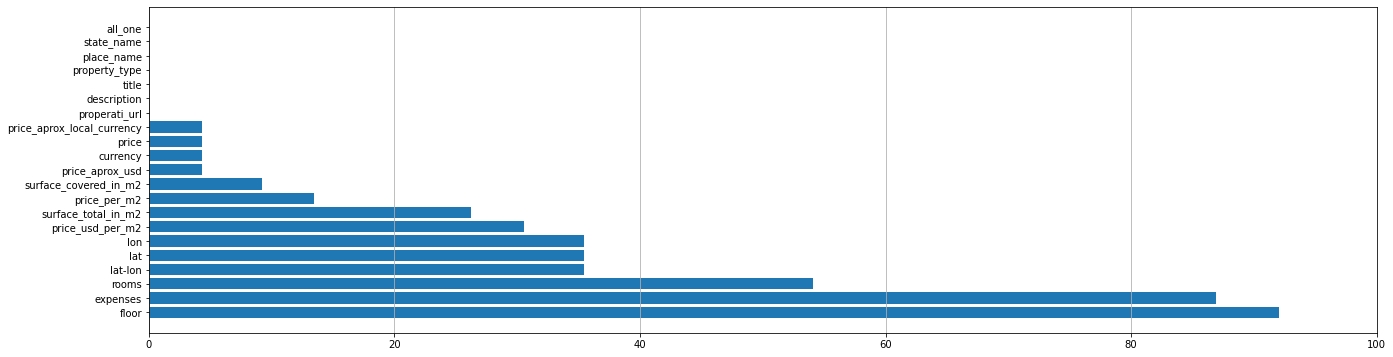

In [73]:
sustraccion = ['Corrientes', 'Bs.As. G.B.A. Zona Sur', 'Salta', 'Tucumán']
print ('Lugares llamativos:\n* Corrientes tiene estadisticos Nulos en todo menos en departamentos, pero tiene muy baja CV de 0.034, muy baja\n* BSAS Zona Sur: tiene 2 tipo de propiedades nulos y en las otras 2 tiene muy buenos valores de CV\n* Salta: o no tiene valores o tiene CV por encima de 1.6\n* Tucuman: aporta valor solo en apartment con CV0.8 nan no pasó PH filter\nSe extraen en datipic:')
print (sustraccion)
datipic_1 = pd.DataFrame()
datipic_1.columns.name = 'Localidades atipicas'
mask = (data.state_name == sustraccion[0]) | (data.state_name == sustraccion[1]) | (data.state_name == sustraccion[2]) | (data.state_name == sustraccion[3])
datipic_1 = data.loc[mask]

print ('listo: se sustrajeron los datos de Corrientes, Bs.As. Zona Sur, Salta, y Tucumán')

print ('\nFiltros aplicados:\n*drop_1_prop_type: eliminacion de la categoria\n*drop_2_prop_type: elimina una parte, la que PH son relativamente pocos\n* data_drop_3_prop_type: elimina una parte, los que store son pocos\nDropiados')
print(drop_1_prop_type)
for state in drop_1_prop_type:
    data.drop(data[data.state_name == state].index, inplace=True)

print ('\nFiltro aplicado: estadisticamente irrelevante, cuando una localidad con pocas publicacione tenía un porcentaje de PH menor al 3,5% del total de sus publicaciones')
print (drop_2_prop_type) # vamos a tirar los PH de determinadas localidades
for state in drop_2_prop_type[1]:    
    mask = (data.property_type == 'PH') & (data.state_name == state)
    data.drop(data[mask].index, inplace=True)
    
print ('\nFiltro aplicado: estadisticamente irrelevante, cuando una localidad tiene menos de 20 stores se dropea')
print (drop_3_prop_type) # vamos a tirar los PH de determinadas localidades
for state in drop_3_prop_type[1]:    
    mask = (data.property_type == drop_3_prop_type[0]) & (data.state_name == state)
    data.drop(data[mask].index, inplace=True)    
    
print ('\nFinalmente: dropiamos las entradas que sustreamos como atipicas en datipic_1')

index_drop = data.index.intersection(datipic_1.index)
data = data.drop(index_drop)
display (data)

df = data_info(data, 'data limpieza_2')
#df = df.sort_values(by='pct_nan', ascending=False)
Dicto['limpieza_2'] = df.to_dict()

fig, ax = plt.subplots(figsize=(22, 6))
ax.grid(axis='x')
axes= plt.gca()
axes.set_xlim(0,100)
plt.barh(df.columna, df.pct_nan, label='porcentaje de NaN\'s')

In [74]:
# Resumen

Dicto['stats_property_type'] = df_statics_1, df_statics_2, df_statics_3, df_statics_4
Dicto['datipic'] = datipic_1.to_dict()
print (Dicto.keys())
print ('df_raw y limpieza_1 y limpieza_2: son la funcion data_info(data) sin modificaciones, con la primera limpieza y con la segunda limpieza, repectivamente')
print ('stats_property_type: hay un frame de estadistica descriptiva por cada tipo de propiedad en funcion de la localidad, con valores 0 los que no pasaron la prueba')
print ('datipic_1: localidad atipica: es un frame que contempla 4 localidades: Corrientes, Buenos Aires Zona Sur, Salta y Tucuman, estos valores se expulsan del data')
print ('vamos a armar 2 categorias: grupo de riesgo y grupo estable: categorizando por CV PENDIENTE (!)')

dict_keys(['df_raw', 'limpieza_1', 'limpieza_2', 'stats_property_type', 'datipic'])
df_raw y limpieza_1 y limpieza_2: son la funcion data_info(data) sin modificaciones, con la primera limpieza y con la segunda limpieza, repectivamente
stats_property_type: hay un frame de estadistica descriptiva por cada tipo de propiedad en funcion de la localidad, con valores 0 los que no pasaron la prueba
datipic_1: localidad atipica: es un frame que contempla 4 localidades: Corrientes, Buenos Aires Zona Sur, Salta y Tucuman, estos valores se expulsan del data
vamos a armar 2 categorias: grupo de riesgo y grupo estable: categorizando por CV PENDIENTE (!)


### fin modulo: limpieza preliminar de los datos


### PATRON REGEX, LECTURA Y ANALISIS DE DATA_GEO

In [75]:
# Armamos una busqueda con links de googlemaps en la descripcion del articulo:
print ('patron: googlemaps\n')
patron = '(?P<googlemaps>https://([a-z./0-9]+maps[a-z./0-9]+))'
regex = re.compile(patron, flags=re.IGNORECASE)
googlemaps = df_raw.description.apply(lambda x: regex.search(str(x)))
googlemaps.notnull().value_counts()  #Donde se verifican los valores del print

print ('Dentro de la columna "description" encontramos {} matches'.format(googlemaps.notnull().value_counts()[1]))

googlemaps = googlemaps.apply(lambda x: x if x is None else x.group('googlemaps'))
#googlemaps[googlemaps.notnull()]


patron: googlemaps

Dentro de la columna "description" encontramos 47 matches


In [76]:
print('''data_geo['googlemaps'] = googlemaps
columnas =['place_name','state_name', 'googlemaps']

display (data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notnull(), columnas])
print ('Numero de match encontrado donde faltan datos geográficos: ',data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notna(),'googlemaps'].shape[0])

rta:
Numero de match encontrado donde faltan datos geográficos:  25
''')


data_geo['googlemaps'] = googlemaps
columnas =['place_name','state_name', 'googlemaps']

display (data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notnull(), columnas])
print ('Numero de match encontrado donde faltan datos geográficos: ',data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notna(),'googlemaps'].shape[0])

rta:
Numero de match encontrado donde faltan datos geográficos:  25



In [77]:
print ('Precaucion que puede haber caracteres adicionales al final del link que corresponden a letras de la palabra siguiente')

Precaucion que puede haber caracteres adicionales al final del link que corresponden a letras de la palabra siguiente


In [78]:
## MODULO DE BACKUP DE DATOS EN ARCHIVO CSV

#data_geo.to_csv('data_geo.csv')

data_geo = pd.read_csv('data_geo.csv')


recupero_1 = ['complejo_1', 'complejo_2']
recupero_2 = ['barrio_1', 'barrio_2', 'barrio_3']
recupero_3 = ['en_sobre_1', 'en_sobre_2','en_sobre_3']
recupero_4 = ['sobre_calle_1', 'sobre_calle_2', 'sobre_calle_3']
recupero_5 = ['en_calle', 'entre']
recupero_6 = ['en_bv', 'en_boulevar']
recupero_7 = ['en_av', 'en_avenida']

recuperados = [recupero_1, recupero_2, recupero_3, recupero_4, recupero_5, recupero_6, recupero_7]
columnas = recupero_1 + recupero_2 + recupero_3 + recupero_4 + recupero_5 + recupero_6 + recupero_7

data_geo_ubic = data_geo.loc[data_geo['lat-lon'].isna(),columnas]
data_geo = data_geo.loc[:, columnas]

In [79]:
try:
    error_forzado
    #conda install qgrid
    #jupyter nbextension enable --py --sys-prefix qgrid
    #jupyter nbextension enable --py --sys-prefix widgetsnbextension

except:
    print ('proximas actualizacion')
    
try:
    1/0
    import qgrid

except:
    print ('proximas actualizaciones')

proximas actualizacion
proximas actualizaciones


In [80]:
def menu_visualizacion(data = data_geo, recuperados = recuperados):
    columna = ['lat-lon', 'place_name', 'state_name']
    print ('Seleccione una opcion:')
    for i,v in enumerate(recuperados):
        print (f'\t{i+1}) patron_{i+1}: {v}')
    opcion = input('\n>> ')
    try:
        opcion = int(opcion)
        if opcion < 1 or opcion > 7:
            print ('opcion no valida')
            return
        else:
            columna += recuperados[opcion-1]
            mask_data = data_geo[recuperados[opcion-1]].notna().any(axis=1)
            display (data_geo.loc[mask_data, columna])
            data_recupero = data_geo.loc[mask_data, columna]
            return data_recupero
    except:
        print ('opcion no validaa')
        return
    
def apertura_menu():
    print ('Desea abrir el modulo de visualizacion dato de ubicacion?')
    check = input('(1:si / 0 :no)\n>> ')
    try:
        int(check)
        if check == '0':
            return
        elif check == '1':
            return True
            
        else:
            'Operacion abortada'
    except:
        print ('Opcion no valida')
        return


In [81]:
### MODULO FUNCIONAL PERO ESTORBA EL TRABAJO FLUIDO
#if apertura_menu():
#    data_recupero = menu_visualizacion()
#    data_recupero['geonames_id'] = False
#    a = 'data_recupero'

In [82]:
print ('Continuar ejecucion de codigo')#INPUT

Continuar ejecucion de codigo


In [83]:
try:
    print (a)
    display (data_recupero)
    print (a)
    nuloss(data_recupero)
    porcentaje_nuloss(data_recupero)
    print ('Accion:\n* Base de datos cargada: {}'.format(a))
except:
    print ('no hay una base de datos cargada')
    
try:
    widget = qgrid.show_grid(data_recupero)
    widget

except:
    print ('Hay actualizacion pendientes')

Empty DataFrame
Columns: [place_name, geonames_id]
Index: []
no hay una base de datos cargada
Hay actualizacion pendientes


----------------------
**ANALISIS DE LOS PATRONES OBTENIDOS CARGADOS DESDE .CSV**

-----------------

In [84]:
df = data_info(data_geo)
df.sort_values(by='count', inplace=True)
df.set_index('columna',inplace=True)
df['rendimiento_patron'] = round((df['count']- df.count_unique)/df['count']*100,2)
df

df de data,Nan,dtype,count,pct_nan,count_unique,rendimiento_patron
columna,,,,,,
en_bv,121158,object,62,99.95,54,12.90
en_boulevar,121152,object,68,99.94,58,14.71
sobre_calle_1,121042,object,178,99.85,86,51.69
en_avenida,121031,object,189,99.84,142,24.87
sobre_calle_3,120944,object,276,99.77,83,69.93
complejo_2,120063,object,1157,99.05,565,51.17
en_calle,119987,object,1233,98.98,655,46.88
entre,119987,object,1233,98.98,873,29.20
complejo_1,119426,object,1794,98.52,467,73.97


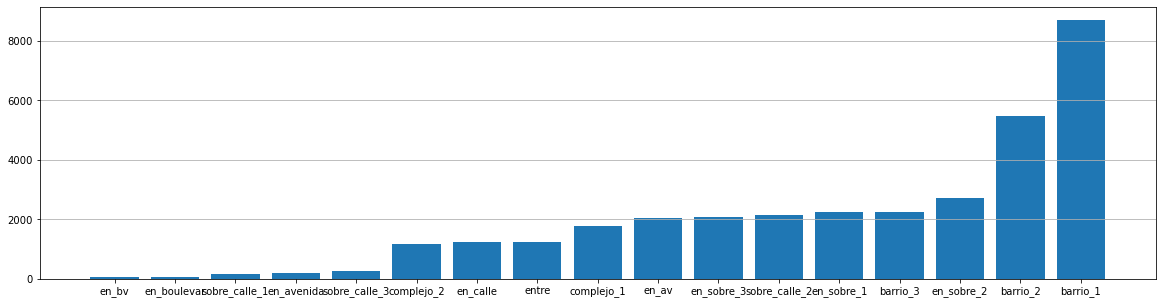

In [85]:
titulo = 'repercusion de los patrones'
serie = df['count']
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax.bar(serie.index, serie)
ax.grid(axis='y')
plt.show()

In [86]:
#repercusion de los patrones 2

bins = [0,1000,2000,4000,np.inf]
print ('bins: ',bins)
labels = ['menos_1000', '1000_a_2000', '2000_a_4000', '4000_a_>8000']

df['Categoria_recupero'] = pd.cut(df['count'], bins=bins, labels=labels)



bins:  [0, 1000, 2000, 4000, inf]


In [87]:
agg = df.groupby('Categoria_recupero').size().to_frame()
agg.columns = ['Cantidad patrones']
agg



,Cantidad patrones
Categoria_recupero,
menos_1000,5
1000_a_2000,4
2000_a_4000,6
4000_a_>8000,2


In [88]:
#print ('CONCLUSION:\n* Pudimos visualizar la respuesta de nuestros patrones\n* Vamos a armar una categoria para los patrones\n* 0 a 500: Bajo\n* 500 a 1000: estrategico\n* los otros 3 seran Barriox2  y sobre_calle\n* asumiendo que esos patrones representan lugares con alto nivel de oferta, la categoria será: demandada')

------------
**CONCLUSION**

---------------

Vamos a etiquetar los matches para ver que nos devuelve el algoritmo

# 5. BUSQUEDA DE GEONAMES_ID

Vamos a completar la columna geonames_id en funcion de place_name 

In [89]:
data_geo_id = df_raw.copy()

columna = ['place_name', 'state_name', 'lat-lon', 'geonames_id']

columnas = []
for elemento in data_geo_id.columns:
    if elemento not in columna:
        columnas.append(elemento)
        
data_geo_id.drop(columnas, axis=1, inplace=True)
data_geo_id

,place_name,state_name,geonames_id,lat-lon
0,Mataderos,Capital Federal,3430787.0,"-34.6618237,-58.5088387"
1,La Plata,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295"
2,Mataderos,Capital Federal,3430787.0,"-34.6522615,-58.5229825"
3,Liniers,Capital Federal,3431333.0,"-34.6477969,-58.5164244"
4,Centro,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468"
...,...,...,...,...
121215,Belgrano,Capital Federal,3436077.0,NaN
121216,Beccar,Bs.As. G.B.A. Zona Norte,3436080.0,NaN
121217,Villa Urquiza,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355"
121218,Plaza Colón,Buenos Aires Costa Atlántica,NaN,NaN


In [90]:
# ENTRADAS QUE SON NULAS EN LATLON Y QUE SON NULAS EN GEONAMES_ID
mask_data = data_geo_id['lat-lon'].isna() & data_geo_id.geonames_id.isna()
data_check = data_geo_id[mask_data]
display (data_check)



,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,NaN,NaN
104,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
109,Boulogne Sur Mer,Bs.As. G.B.A. Zona Norte,NaN,NaN
261,Las Golondrinas,Bs.As. G.B.A. Zona Sur,NaN,NaN
324,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
...,...,...,...,...
121136,Palermo Hollywood,Capital Federal,NaN,NaN
121137,Palermo Hollywood,Capital Federal,NaN,NaN
121139,Punta Iglesia,Buenos Aires Costa Atlántica,NaN,NaN
121140,Altos de Hudson I,Bs.As. G.B.A. Zona Sur,NaN,NaN


In [91]:
serie_place_name = data_check.place_name
serie_place_name = serie_place_name.unique()
serie_place_name = pd.Series(serie_place_name) 
#podria hacerse un intersection index y serias un grosardo
serie_place_name;

In [92]:
# quiero verificar si la serie serie_place_name, la puedo ubicar dentro de data_geo_id.place_name para leer el geoname_id
lista = []
geonames_dic = {}
for i,v in enumerate(serie_place_name):
    mask_data = data_geo_id.place_name == v
    a = data_geo_id.loc[mask_data,['place_name', 'geonames_id']].loc[data_geo_id.geonames_id.notna()]
    place_name = list(a['place_name'].unique())
    geonames_id = list(a['geonames_id'].unique())
    
    result = dict(geonames_id = geonames_id)
    geonames_dic[v] = result
  

    
print ('a ver') ##WARNING
#geonames_dic

a ver


In [93]:
# Lista para quedarme con los indices de las listas con al menos 1 elemento dentro
lista = []
for i,v in enumerate(geonames_dic.values()):
    for j in v.values():
        if len(j) > 0:
            lista.append(i)

lista;

In [94]:
# Diccionario que me guarda las keys del primer diccionario y la value del diccionario interno
geonames_id_dic = {}
for i,v in enumerate(geonames_dic.keys()):
    if i in lista:
        for j in geonames_dic[v].values():
            pass
        geonames_id_dic[v] = j

geonames_id_dic;

In [95]:
# Dentro de la columna place_name if lat-lon.isnull and geonames_id isnull: quiero colocar los ID recien encontrados
for i,v in enumerate(geonames_id_dic.keys()):
    mask_data = data_check.place_name == v
    data_check.loc[mask_data, 'geonames_id'] = geonames_id_dic[v][0] # tomo por default el primero
data_check

C:\Users\Agustin\anaconda3.2\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,3429979.0,NaN
104,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
109,Boulogne Sur Mer,Bs.As. G.B.A. Zona Norte,NaN,NaN
261,Las Golondrinas,Bs.As. G.B.A. Zona Sur,NaN,NaN
324,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
...,...,...,...,...
121136,Palermo Hollywood,Capital Federal,NaN,NaN
121137,Palermo Hollywood,Capital Federal,NaN,NaN
121139,Punta Iglesia,Buenos Aires Costa Atlántica,NaN,NaN
121140,Altos de Hudson I,Bs.As. G.B.A. Zona Sur,NaN,NaN


In [96]:
display (data_check[data_check.geonames_id.notna()])
print ('Observacion:\n* Logramos recuperar 2524 datos de geonames_id con datos nulos en la columna lat-lon')

,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,3429979.0,NaN
777,Vicente López,Bs.As. G.B.A. Zona Norte,3427504.0,NaN
3943,Malvinas Argentinas,Bs.As. G.B.A. Zona Norte,3845073.0,NaN
7852,Malvinas Argentinas,Bs.As. G.B.A. Zona Norte,3845073.0,NaN
9375,Tigre,Bs.As. G.B.A. Zona Norte,3427753.0,NaN
...,...,...,...,...
120278,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN
120279,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN
120300,Lanús,Bs.As. G.B.A. Zona Sur,3432134.0,NaN
120960,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN


Observacion:
* Logramos recuperar 2524 datos de geonames_id con datos nulos en la columna lat-lon


In [97]:
serie_recupero = data_check[data_check.geonames_id.notna()].geonames_id
serie_recupero;

In [98]:
# VALOR ORIGINAL
print ('{} datos nulos en geonames_id'.format(data_geo_id['geonames_id'].isna().sum()))

18717 datos nulos en geonames_id


In [99]:
# VALOR ACTUAL
data_geo_id['geonames_id'] = data_geo_id['geonames_id'].fillna(serie_recupero)

print ('{} datos nulos en geonames_id'.format(data_geo_id['geonames_id'].isna().sum()))

16193 datos nulos en geonames_id


In [100]:
18717-16193

2524

# 6. MODULO DE EXPLORACION VISUAL

In [101]:
#pd.options.display.max_rows = 4
print ('Dicto: Tomamos los dataset "df_raw", "limpieza_1" y ""limpieza_2" analisis descriptivo de los datos')


Dicto: Tomamos los dataset "df_raw", "limpieza_1" y ""limpieza_2" analisis descriptivo de los datos


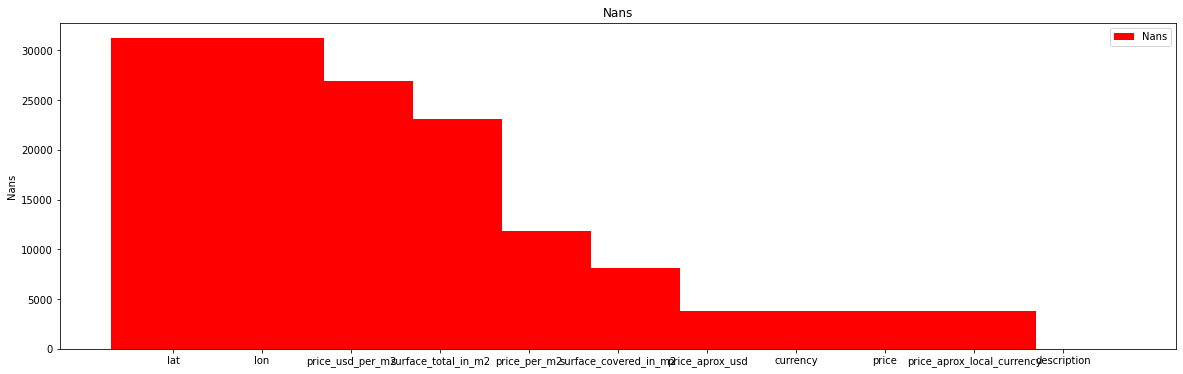

In [102]:
df = pd.DataFrame(Dicto['limpieza_2'])
df.set_index('columna', inplace=True)
df['old_index'] = Dicto['limpieza_2']['columna'].keys()
df;

raw_drop = ['floor', 'expenses', 'rooms', 'lat-lon']
df.drop(raw_drop, inplace=True)
serie = df[df.Nan != 0]['Nan']

### diagrama de barras
fig = plt.figure(figsize=(20,6))
ax= plt.axes()
ax.bar(np.arange(len(serie)) ,serie.values, width=1.4, color='red')
ax.set_ylabel('Nans'), ax.set_title('Nans')
ax.set_xticks(np.arange(len(serie))); ax.set_xticklabels(serie.index.to_list())

ax.legend(labels=['Nans'])
plt.show()


## Analisis exploratorio

In [ ]:
def resumen_dataset(name=d, frame=data):
    print(f'\n\tRESUMEN DEL DATASET: {name}')
    display (frame.head(2))
    display (frame.describe()[:3])
    print (f'\n\tSECCION NULOS DATASET: {name}')
    display (nuloss(data=frame))
    display (porcentaje_nuloss(frame))
    print ('Shape del dataset {}'.format(frame.shape))

In [ ]:
d

In [ ]:
data_check = data_recupero_prop_type.copy()
dc = 'data_check'

In [ ]:
resumen_dataset(name=dc, frame=data_check)

In [ ]:
### SETEO DATA_CHECK
### AGRUPAMIENTO
data_check = data_recupero_prop_type.copy()
dc = 'data_check'

# PRIMERO VAMOS A SACAR TODOS LOS PRECIOS EXPRESADOS EN PESOS
display ('Shape original: ',data_check.shape)
mask_data = data_check.currency == 'USD'
data_check = data_check[mask_data]
display ('Shape actual: ',data_check.shape)

# AHORA VAMOS A CONTROLAR LAS COLUMNAS QUE NECESITAMOS
display (data_check.columns)
print ('Resultado:\n* Conservamos: property_type, state_name, price, surface_covered_in_m2, surface_total_in_m2')
columnas = ['property_type', 'state_name', 'price', 'surface_covered_in_m2', 'surface_total_in_m2']
data_check = data_check.filter(columnas, axis=1)

print ('\n', dc)
nuloss(data_check)

#ELIMINAMOS TODOS LOS NULOS
data_check.dropna(inplace=True)
print ()
resumen_dataset(name=dc, frame=data_check)




In [ ]:
## AGRUPAMOS EL DATA_CHECK 2
columnas = ['price']
indices = ['property_type', 'state_name']

print ('OBJETO: grupo. Name: grupo_usd')
grupo_usd = data_check[columnas+indices].groupby(indices).aggregate(['mean'])
#display (grupo_usd)

resumen_dataset(name='grupo_usd', frame=grupo_usd)
grupo_usd.loc['PH']

In [ ]:
type(grupo_usd.loc['PH'])

#indice = grupo_usd.loc['PH'].index
#indice
type(grupo_usd.loc['PH','price'])
frame = grupo_usd.loc['PH','price']
serie = frame['mean']

titulo = 'Estadisticos de PH por ubicacion'
serie = serie
gaps_columns(titulo, serie)

#type(indice)
#serie = pd.Series(grupo_usd.loc['PH'], index=indice)
#serie

In [ ]:
#[11:50 p. m., 10/2/2022] Agustín Helou DH: # Analisis de CABA con Geopandas Precio promedio del M2 y superficie promedio por barrio
try:
    import geopandas
    from shapely import wkt
    barrios= pd.read_csv('barrios.csv') # Traigo dataset con los datos geograficos
    barrios= barrios.set_index('barrio') 
    graficos_caba = data_recupero_prop_type.copy() # Creo un nuevo dataframe para trabajar
    graficos_caba = graficos_caba.loc[(graficos_caba.state_name == 'Capital Federal') & (graficos_caba.price_usd_per_m2 < 9000)& (graficos_caba.price_usd_per_m2 > 300)] # Filtro los datos que probablemente sean ilogicos (en Boedo habia unp haciendo ruido)
    graficos_caba = graficos_caba[['state_name', 'place_name','price_usd_per_m2', 'surface_total_in_m2']] # Selecciono las columnas que voy a utilizar
    graficos_caba.place_name = graficos_caba.place_name.str.upper() # Paso todo a mayusculas como esta en el Dataset de barrios
    graficos_caba = graficos_caba.groupby(['place_name']).mean() # Agrupo y armo los promedios
    graficos_caba = pd.merge(graficos_caba, barrios, left_index=True,right_index=True) # Uno los dataframes
    fig, ax = plt.subplots(figsize=(10,10)) # Creo el espacio para el grafico
    fig.suptitle('Valor promedio del M2 por Barrio en CABA',fontweight='bold',size=15) # Pongo titulo
    graficos_caba = geopandas.GeoDataFrame(graficos_caba, geometry=graficos_caba.WKT.apply(wkt.loads)) # Lo paso a geopandas dataframe
    graficos_caba.plot(ax=ax, color='white', edgecolor='black') # Ploteo los barrios
    graficos_caba.plot(ax=ax,column='price_usd_per_m2', cmap='Greens', legend=True, edgecolor='black') # Coloreo por Precio M2 Promedio
    fig, ax = plt.subplots(figsize=(10,10)) # Creo el espacio para el grafico
    fig.suptitle('Cantidad promedio de M2 por propiedad por Barrio en CABA',fontweight='bold',size=15) # Pongo titulo
    graficos_caba = geopandas.GeoDataFrame(graficos_caba, geometry=graficos_caba.WKT.apply(wkt.loads)) # Lo paso a geopandas dataframe
    graficos_caba.plot(ax=ax, color='white', edgecolor='black') # Ploteo los barrios
    graficos_caba.plot(ax=ax,column='surface_total_in_m2', cmap='Greys', legend=True, edgecolor='black') # Coloreo por Superficie M2 Promedio
except:
    print ('cargar Kernel de geopandas')

In [ ]:
try:
    graficos_caba
except:
    print ('cargar Kernel de geopandas')

# 7. MODULO DE RECONSTRUCCION DEL DATASET

## FUNCIONES ANTERIORES

In [ ]:
#····#····#····#····#····#····#····#
#    MODULO VISUALIZACION DATASET  #
#····#····#····#····#····#····#····#

def resumen_dataset(name=d, frame=data):# INFORMACION GENERAL DEL DATASET
    print(f'\n\tRESUMEN DEL DATASET: {name}')
    print ('.head(2)')
    display (frame.head(2))
    print ('describe()')
    display (frame.describe()[:3])
    print (f'\n\tSECCION NULOS DATASET: {name}')
    display (nuloss(data=frame))
    display (porcentaje_nuloss(frame))
    print ('Shape del dataset {}'.format(frame.shape))

def nulos(data=data): # CREA VARIABLE NULOS
    result = data.isnull().sum().sort_values(ascending = False)
    return result

def nuloss(data=data): # MUESTRA VARIABLE NULOS
    print ('>> DATOS NULOS:\n')
    display (data.isnull().sum().sort_values(ascending = False))
    return

def porcentaje_nulos(data=data): # CREA VARIABLE 
    result = data.isnull().sum().sort_values(ascending = False)/data.shape[0] *100
    return result

def porcentaje_nuloss(data=data): # MUESTRA VARIABLE
    print ('>> PORCENTAJE DE DATOS NULOS:\n')
    display( round(data.isnull().sum().sort_values(ascending = False)/data.shape[0] *100,2))
    return

# FUNCION PARA CREAR LA COLUMNA DE COUNTS: REVISAR REPERCUSION DE DE PATRONES

#····#····#····#····#····#
#   MODULO INSPECCION
#····#····#····#····#····#

def prueba_isna(frame, label_list, label):
    print (f'Comparacion de cantidad de NaN types en funcion de la columna {label}')
    mascara_comparativa = frame[label].isna()
    print (frame.loc[mascara_comparativa,label_list].isna().sum().to_string())

#entragas un dataframe, la lista de columnas que queres chequear, y la label de la columna que se toma de referencia



#····#····#····#····#····#
# MODULO INTERACTIVO PARA CREACIOND DE VARIABLES
#····#····#····#····#····#

# logica de aplicacion:
#if apertura_menu():
	#data_nueva = menu_visualizacion()

def menu_visualizacion(data = data_geo, recuperados = recuperados):
    columna = ['lat-lon', 'place_name', 'state_name']
    print ('Seleccione una opcion:')
    for i,v in enumerate(recuperados):
        print (f'\t{i+1}) patron_{i+1}: {v}')
    opcion = input('\n>> ')
    try:
        opcion = int(opcion)
        if opcion < 1 or opcion > 7:
            print ('opcion no valida')
            return
        else:
            columna += recuperados[opcion-1]
            mask_data = data_geo[recuperados[opcion-1]].notna().any(axis=1)
            display (data_geo.loc[mask_data, columna])
            data_recupero = data_geo.loc[mask_data, columna]
            return data_recupero
    except:
        print ('opcion no validaa')
        return
    
def apertura_menu():
    print ('Desea abrir el modulo de visualizacion dato de ubicacion?')
    check = input('(1:si / 0 :no)\n>> ')
    try:
        int(check)
        if check == '0':
            return
        elif check == '1':
            return True
            
        else:
            'Operacion abortada'
    except:
        print ('Opcion no valida')
        return



#····#····#····#····#····#  SUMAR ACA LOS GRAFICOS DE DANIELA 
#   MODULO GRAFICOS
#····#····#····#····#····#

def gaps_columns(titulo, serie):
    fig, ax = plt.subplots(figsize=(12,4))
    barras = plt.bar(serie.index, serie)
   
    for barra in barras:
        x = barra.get_x()
        y = barra.get_y()
        ancho = barra.get_width()
        plt.text(x+ancho/2,y, round(y,2), fontsize=10, color='black', ha='center')
    plt.show()

# Crea un grafico DE BARRAS



#····#····#····#····#····#
#   MODULO OUTLIER
#····#····#····#····#····#

def rango_extremos(frame, label, quant_list = [2.5, 97.5]):
        for i,v in enumerate(quant_list):
            if v < 0 or v > 1:
                quant_list[i] = v/100
        
        rango_outlier = frame[label].quantile(quant_list)
        print ('range_outlier: type: {}, len: {}'.format(type(rango_outlier),len(rango_outlier)))
        return list(rango_outlier)


def mascara_outlier(frame, label, rango_outlier):
    if rango_outlier == [0.0 , 0.0]:
        rango_outlier = rango_extremos(frame=frame, label=label)
    mascara_outlier = ((frame[label].dropna() >= rango_outlier[0]) & (frame[label].dropna() <= rango_outlier[1])).index
    return mascara_outlier





#····#····#····#····#····#
#  PROXIMAS ACTUALIZACIONES
#····#····#····#····#····#
indices = []

def work_list(columnas = columnas, indices=indices):
    work_list = []
    work_list = columnas + indices
    return work_list
def work_listt(lista=work_list()):
    print (lista)
# Crea una lista de las columnas necesarias para el analisis: funcion: groupby

#def crea_busqueda_iterada
#for i in range(3):
#    i += 1
#    column_name = 'ubic'+str(i)
#    serie_ubic_aux = serie_ubic.apply(lambda x: x if x is None else x.group('ubic'+str(i)))
#    data_ubic.insert(loc=i-1, column=column_name, value=serie_ubic_aux)

#def definiar_categoria(bins,labels):


#iterar series para añadirsela a un dataframe limpio - proviene de celda 85

## FUNCIONES NUEVAS

## 7.1 reconstruccion del dataset

In [105]:
#····#····#····#····#····#····#····#
#   NO EJECUTAR ESTA CELDA VINIENDO DESDE ABAJO
data_v1 = data.copy()

#····#····#····#····#····#····#····#

In [106]:
data = df_raw.copy()
d = 'data'
#resumen_dataset('data',data)

##  7.2 ANALISIS PRECIO: COTIZACION DIVISA, COTIZACION INMUEBLE, CRITERIOS LOGICOS

COLUMNAS:
    
    - (price, currency)
    - price_aprox_usd
    - price_usd_per_m2
    - price_aprox_local_currency
    - price_per_m2
    
COLUMNAS DE TRABAJO AUXILIAR:

    - surface_total_in_m2
    - surface_covered_in_m2
    
COLUMNAS PROYECTADAS A SER CREADAS:

    - surface_recovery = tomar un criterio general de seleccion para todos los cálculos
    - diff_change = columna check: la diferencia entre dos valores, o el cociente, o el delta porcentual
    - control_cruzado =
    
FUTUROS RECUPEROS:

    - tupla_recupero_1

In [107]:
# PARTE 1
mask_data = data.surface_total_in_m2.notna() & data.surface_covered_in_m2.notna()
mask_data = data[mask_data].surface_total_in_m2 >= data[mask_data].surface_covered_in_m2 # comprobamos que haya logica Total > Cubierto
data['surface_total_in_m2'].fillna(0, inplace=True)
data['surface_covered_in_m2'].fillna(0, inplace=True)
data['surface_total_in_m2_mod'] = np.maximum(data.surface_total_in_m2, data.surface_covered_in_m2)
data['surface_total_in_m2_mod'] = data['surface_total_in_m2_mod'].replace(0,np.nan)
data['surface_total_in_m2'] = data['surface_total_in_m2'].replace(0,np.nan)
data['surface_covered_in_m2'] = data['surface_covered_in_m2'].replace(0,np.nan)
# CREAMOS LA COLUMNA surface_total_in_m2_mod, y reemplazamos todos los valores cero por nans en las columnas surface_total_in_m2 y surface_covered_in_m2
#resumen_dataset('data',data)

# PARTE 2: #comprobamos que hay valores ilogicos porque price_usd_per_m2 es mayor a price_per_m2 que esta en pesos
mask_data = data.currency == 'ARS'
data.drop((data[mask_data].loc[data.price_per_m2 < data.price_usd_per_m2]).index, inplace=True)

# PARTE 3: DEFINICION DEL TIPO DE CAMBIO
tc = np.mean(data.price_aprox_local_currency/data.price_aprox_usd) # tc promedio 17.6444


# PARTE 4: ANALISIS DE FIABILIDAD DE price_aprox_usd
data.loc[data.currency=='ARS', 'control_cruzado_precio_usd'] = data.price/tc
data['diff_pct_change'] = (data['control_cruzado_precio_usd'] / data['price_aprox_usd']-1)*100 
#podemos concluir que es una columna confiable para tomar como precio en usd con un rango de desvio relativamente bajo de 1.05% a -2.84%

# PARTE 5: PASAR LA COLUMNA price A UN SOLO TIPO DE CAMBIO
mask_data = data.currency == 'ARS'
data.loc[mask_data, 'price'] = data[mask_data].price / tc
data.loc[mask_data, 'currency'] = 'USD'
# ACLARACION A TENER EN CUENTA: HAY 20414 entradas cuya currency está en Nan # check el desvio de esa parte (!)
mask_data = data.loc[:,'currency'] != 'USD'
mask_data = data.loc[mask_data,'currency'].dropna().index
serie_recupero_1 = mask_data
string_recupero_1 = 'Type <Index>: HAY 3 PROPIEDADES QUE NO ESTAN EXPRESADAS NI EN DOLARES NI EN PESOS ARGENTINOS'
tupla_recupero_1 = (serie_recupero_1, string_recupero_1)
data.drop(mask_data, inplace=True)

# PARTE 6: ELIMINAMOS 870 VALORES INCOHERENTES: CRITERIO: RANGO DE DESVIO, SOBRE: PRECIO/SUPERICIE
data['control_cruzado_precio_m2_usd'] = data['price_aprox_usd'] / data['surface_total_in_m2_mod']
data['diff_pct_change_2'] = (data['control_cruzado_precio_m2_usd'] / data['price_usd_per_m2'] -1 )*100
# ' Elimino del dataset de trabajo los que tenian desvios de +- 4.75%'
mask_data = data.loc[(data['diff_pct_change_2'] < -4.75) | (data['diff_pct_change_2'] > 4.75)].index # saco las que tienen desvio de +-4.75%
data.drop(mask_data, inplace=True)

# PARTE 7: 'ANALISIS DE RECUPERO price_usd_per_m2 POR price_aprox_usd/surface_total_in_m2_mod'
mask_data = data.price_usd_per_m2.isna() & data.price_aprox_usd.notna() & data.surface_total_in_m2_mod.notna()
data['recupero'] = data.loc[mask_data,'price_aprox_usd'] / data.loc[mask_data, 'surface_total_in_m2_mod']
data['price_usd_per_m2'].fillna(data['recupero'], inplace=True)


In [108]:
data['price_recovery'] = data.price_usd_per_m2 * data.surface_total_in_m2_mod
print (data.loc[data.price.isna(),'price_recovery'].notna().sum())
print ('no podemos recuperar valores de price')

0
no podemos recuperar valores de price


In [109]:
"""   PORCENTAJE DE DATOS NULOS
    VERSION ORIGINAL                        VERSION ACTUAL
price_usd_per_m2              43.39  /  price_usd_per_m2                 23.51
surface_total_in_m2           32.44  /  surface_total_in_m2              33.00
price_per_m2                  27.69  /  price_per_m2                     27.89
currency                      16.84  /  currency                         16.96
price_aprox_usd               16.84  /  price_aprox_usd                  16.96
price_aprox_local_currency    16.84  /  price_aprox_local_currency       16.96
price                         16.84  /  price                            16.96
surface_covered_in_m2         16.42  /  surface_covered_in_m2            16.54


NUEVAS COLUMNAS CREADAS
diff_pct_change                  89.08
control_cruzado_precio_usd       89.08
recupero                         79.80
diff_pct_change_2                43.71
control_cruzado_precio_m2_usd    23.51
surface_total_in_m2_mod          10.59
""";

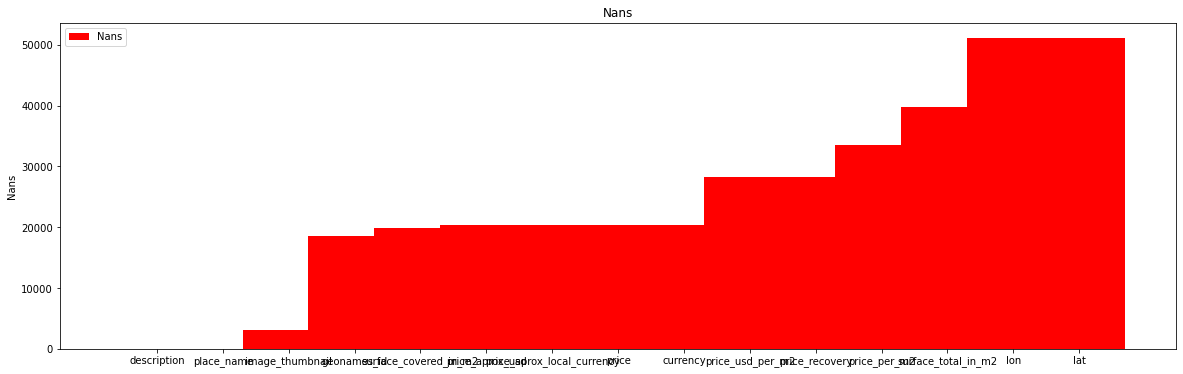

In [110]:
columnas = [ 'diff_pct_change', 'control_cruzado_precio_usd','recupero','diff_pct_change_2','control_cruzado_precio_m2_usd','surface_total_in_m2_mod']
data_price = data.filter(columnas, axis=1)
data.drop(columnas, axis=1, inplace=True)

df = data_info(data)
df = df.set_index('columna').sort_values(by='count', ascending=False)
df;

raw_drop = ['floor', 'expenses', 'rooms', 'lat-lon']
df.drop(raw_drop, inplace=True)
serie = df[df.Nan != 0]['Nan']

### diagrama de barras
fig = plt.figure(figsize=(20,6))
ax= plt.axes()
ax.bar(np.arange(len(serie)) ,serie.values, width=1.4, color='red')
ax.set_ylabel('Nans'), ax.set_title('Nans')
ax.set_xticks(np.arange(len(serie))); ax.set_xticklabels(serie.index.to_list())

ax.legend(labels=['Nans'])
plt.show()

## 7.3 ANALISIS SUPERFICIE: TIPO DE PROPIEDAD, TIPO DE SUPERFICIE, MODELIZACION ESTADISTICA

COLUMNAS:

    - state_name
    - surface_covered_in_m2
    - surface_total_in_m2
    - property_type
    - price_aprox_in_m2
    - price_usd_per_m2

In [111]:
columnas = ['state_name', 'surface_covered_in_m2', 'property_type', 'surface_total_in_m2']
columnas2 = ['price_aprox_usd', 'price_usd_per_m2']

data_sup = data.copy()
data_sup = data_sup.loc[:,columnas + columnas2]
d = 'data_sup'

print ('\n\nACTUALIZANDO DATASET AL DE TRABAJO\n')
data_drop = data_sup.drop(columnas, axis=1)
data_sup = data_sup.drop(columnas2, axis=1)
#resumen_dataset(d,data_sup)



ACTUALIZANDO DATASET AL DE TRABAJO



In [112]:
# NO ESTA TERMINADO - NO SE PUEDE SUBIR AUN
def rango_extremos(frame, label, quant_list = [2.5, 97.5]):
        for i,v in enumerate(quant_list):
            if v < 0 or v > 1:
                quant_list[i] = v/100
        
        rango_outlier = frame[label].quantile(quant_list)
        rango_outlier = list(rango_outlier)
        print ('range_outlier: type: {}, len: {}, value: {}'.format(type(rango_outlier),len(rango_outlier),rango_outlier))
        return rango_outlier

    
def mascara_outlier_index_list(frame, label, rango_outlier): # el problema que tengo es sacarme solo True de encima y quedarme con el indice de los False - 
    mascara_outlier = (frame[label].dropna() >= rango_outlier[0]) & (frame[label].dropna() <= rango_outlier[1])  #ME QUEDO CON EL RANGO FALSE
    #resulta: mascara booleana quiero quedarme con el indice de los False
    lista_elementos = mascara_outlier.values
    lista_indices = mascara_outlier.index
    lista_elementos = list(lista_elementos)
    lista_indices = list(lista_indices)
    lista_result = []
    for i, booleano in enumerate(lista_elementos):
        if booleano == False:
            lista_result.append(lista_indices[i])
    return lista_result

#def mascara_outlier(frame, label, rango_outlier):
#    if rango_outlier == [0.0 , 0.0]:         # <----------------- esta parte esta buena para tener un valro random
#        rango_outlier = rango_extremos(frame=frame, label=label)
#    frame = frame[label].dropna()
#    mascara_outlier = ((frame[label] >= rango_outlier[0]) & (frame[label] <= rango_outlier[1])).index
#    return mascara_outlier

In [113]:
print ('EXCLUSION DE OUTLIERS\n')
serie_check = data_sup.property_type
#lista_check = list(serie_check)
set_check = set(list(serie_check))
len(set_check)
type(set_check)
########################PROGRAMA PRINCIPAL ################################
lista_rangos = []
lista_drops = []
print ('orden de la iteracion: {}'.format(set_check))
for i,elemento in enumerate (set_check):
    print ('--------------\nITERACION N: {}\n--------------'.format(i+1))
    
    if elemento == 'store':
        mascara_iter_1 = serie_check == elemento
        rango_outlier = rango_extremos(data_sup.loc[mascara_iter_1], 'surface_covered_in_m2', [2.5, 95])
    else:
        mascara_iter_1 = serie_check == elemento
        rango_outlier = rango_extremos(data_sup.loc[mascara_iter_1], 'surface_covered_in_m2')
    
    lista_rangos.append(rango_outlier)
    
    serie_outlier = data_sup.surface_covered_in_m2.loc[mascara_iter_1]
    print ('elementos nans y tipo {} en serie_outlier:'.format(elemento))
    display (serie_outlier)
    print (f'\n\nQuitamos los nans tipo {elemento}, de la columna surface_covered_in_m2')
    mask_data = data_sup.loc[serie_outlier.index, 'surface_covered_in_m2'].dropna()  ##TODOS LOS TIPO ELEMENTOS
    display(mask_data)
    print ('Dataset por tipo {} sin nan'.format(elemento))
    display (data_sup.loc[mask_data.index]) ## prueba impresion
    indice_outlier = mascara_outlier_index_list(data_sup.loc[mask_data.index], 'surface_covered_in_m2', rango_outlier)    
    print (f'\n\ndataset <fila: {elemento}> con los valores de outliers en surface_covered_in_m2\n')
    display (data_sup.loc[indice_outlier]) ## prueba impresion    
    lista_drops.append(indice_outlier)
        


for lista_indices in lista_drops:
    data_sup.drop(lista_indices, inplace=True)

print ('--------------------------------------------------------------------------------\nDataset final:')    
data_sup

#OBSERVACION: AL EJECUTAR SUCESIVAMENTE ESTA CELDA VA TOMANDO OUTLIERS NUEVOS LUEGO DE HABER REMOVIDO LOS ANTERIORES - AÑADIR GRAFICOS

EXCLUSION DE OUTLIERS

orden de la iteracion: {'store', 'apartment', 'PH', 'house'}
--------------
ITERACION N: 1
--------------
range_outlier: type: <class 'list'>, len: 2, value: [18.0, 1398.1999999999975]
elementos nans y tipo store en serie_outlier:


57         30.0
65          NaN
95        180.0
183         NaN
204       103.0
          ...  
120854    122.0
120929      NaN
121073    169.0
121125    403.0
121214    123.0
Name: surface_covered_in_m2, Length: 4106, dtype: float64



Quitamos los nans tipo store, de la columna surface_covered_in_m2


57         30.0
95        180.0
204       103.0
215        80.0
277        20.0
          ...  
120853    144.0
120854    122.0
121073    169.0
121125    403.0
121214    123.0
Name: surface_covered_in_m2, Length: 3125, dtype: float64

Dataset por tipo store sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
57,Capital Federal,30.0,store,30.0
95,Córdoba,180.0,store,NaN
204,Capital Federal,103.0,store,103.0
215,Capital Federal,80.0,store,80.0
277,Capital Federal,20.0,store,NaN
...,...,...,...,...
120853,Capital Federal,144.0,store,154.0
120854,Capital Federal,122.0,store,122.0
121073,Capital Federal,169.0,store,169.0
121125,Capital Federal,403.0,store,403.0




dataset <fila: store> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
3462,Bs.As. G.B.A. Zona Oeste,1.0,store,490.0
3468,Bs.As. G.B.A. Zona Oeste,1.0,store,NaN
3775,Córdoba,1.0,store,NaN
5533,Bs.As. G.B.A. Zona Norte,1846.0,store,NaN
5600,Buenos Aires Costa Atlántica,3000.0,store,3000.0
...,...,...,...,...
108485,Bs.As. G.B.A. Zona Sur,15.0,store,NaN
109320,Bs.As. G.B.A. Zona Norte,1400.0,store,1400.0
112645,Capital Federal,2000.0,store,2000.0
118714,Bs.As. G.B.A. Zona Oeste,25186.0,store,25186.0


--------------
ITERACION N: 2
--------------
range_outlier: type: <class 'list'>, len: 2, value: [26.0, 192.0]
elementos nans y tipo apartment en serie_outlier:


1           NaN
2          55.0
4          35.0
7          40.0
8          60.0
          ...  
121211    205.0
121215     93.0
121217     39.0
121218     48.0
121219     77.0
Name: surface_covered_in_m2, Length: 70781, dtype: float64



Quitamos los nans tipo apartment, de la columna surface_covered_in_m2


2          55.0
4          35.0
7          40.0
8          60.0
12         36.0
          ...  
121211    205.0
121215     93.0
121217     39.0
121218     48.0
121219     77.0
Name: surface_covered_in_m2, Length: 59451, dtype: float64

Dataset por tipo apartment sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
2,Capital Federal,55.0,apartment,55.0
4,Buenos Aires Costa Atlántica,35.0,apartment,35.0
7,Capital Federal,40.0,apartment,45.0
8,Capital Federal,60.0,apartment,65.0
12,Bs.As. G.B.A. Zona Norte,36.0,apartment,39.0
...,...,...,...,...
121211,Bs.As. G.B.A. Zona Norte,205.0,apartment,205.0
121215,Capital Federal,93.0,apartment,113.0
121217,Capital Federal,39.0,apartment,46.0
121218,Buenos Aires Costa Atlántica,48.0,apartment,48.0




dataset <fila: apartment> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
197,Buenos Aires Interior,270.0,apartment,270.0
200,Capital Federal,196.0,apartment,196.0
219,Capital Federal,300.0,apartment,310.0
223,Capital Federal,250.0,apartment,270.0
281,Buenos Aires Costa Atlántica,23.0,apartment,NaN
...,...,...,...,...
120956,Santa Fe,25.0,apartment,25.0
121109,Santa Fe,25.0,apartment,27.0
121121,Capital Federal,24.0,apartment,29.0
121135,Capital Federal,19.0,apartment,80.0


--------------
ITERACION N: 3
--------------
range_outlier: type: <class 'list'>, len: 2, value: [20.0, 210.0]
elementos nans y tipo PH en serie_outlier:


0          40.0
3           NaN
6          78.0
16         98.0
34        160.0
          ...  
120972    206.0
121081     83.0
121104    100.0
121130     12.0
121148    185.0
Name: surface_covered_in_m2, Length: 5712, dtype: float64



Quitamos los nans tipo PH, de la columna surface_covered_in_m2


0          40.0
6          78.0
16         98.0
34        160.0
46        140.0
          ...  
120972    206.0
121081     83.0
121104    100.0
121130     12.0
121148    185.0
Name: surface_covered_in_m2, Length: 4874, dtype: float64

Dataset por tipo PH sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
0,Capital Federal,40.0,PH,55.0
6,Bs.As. G.B.A. Zona Norte,78.0,PH,106.0
16,Capital Federal,98.0,PH,140.0
34,Bs.As. G.B.A. Zona Norte,160.0,PH,172.0
46,Bs.As. G.B.A. Zona Norte,140.0,PH,140.0
...,...,...,...,...
120972,Capital Federal,206.0,PH,NaN
121081,Bs.As. G.B.A. Zona Sur,83.0,PH,NaN
121104,Bs.As. G.B.A. Zona Norte,100.0,PH,NaN
121130,Bs.As. G.B.A. Zona Sur,12.0,PH,NaN




dataset <fila: PH> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
135,Bs.As. G.B.A. Zona Norte,260.0,PH,NaN
4770,Capital Federal,324.0,PH,NaN
4866,Capital Federal,212.0,PH,212.0
4887,Capital Federal,230.0,PH,250.0
5351,Bs.As. G.B.A. Zona Sur,282.0,PH,407.0
...,...,...,...,...
117881,Bs.As. G.B.A. Zona Norte,224.0,PH,NaN
119227,Bs.As. G.B.A. Zona Oeste,255.0,PH,255.0
120692,Capital Federal,231.0,PH,231.0
120777,Capital Federal,220.0,PH,220.0


--------------
ITERACION N: 4
--------------
range_outlier: type: <class 'list'>, len: 2, value: [20.0, 550.0]
elementos nans y tipo house en serie_outlier:


5           NaN
9           NaN
10          NaN
11          NaN
15          NaN
          ...  
121208    178.0
121210    120.0
121212    420.0
121213    600.0
121216    360.0
Name: surface_covered_in_m2, Length: 39743, dtype: float64



Quitamos los nans tipo house, de la columna surface_covered_in_m2


18        270.0
20        148.0
22        200.0
26        190.0
27        425.0
          ...  
121208    178.0
121210    120.0
121212    420.0
121213    600.0
121216    360.0
Name: surface_covered_in_m2, Length: 32986, dtype: float64

Dataset por tipo house sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
18,Bs.As. G.B.A. Zona Norte,270.0,house,270.0
20,Córdoba,148.0,house,148.0
22,Bs.As. G.B.A. Zona Oeste,200.0,house,200.0
26,Bs.As. G.B.A. Zona Norte,190.0,house,230.0
27,Bs.As. G.B.A. Zona Norte,425.0,house,425.0
...,...,...,...,...
121208,Bs.As. G.B.A. Zona Norte,178.0,house,NaN
121210,Bs.As. G.B.A. Zona Norte,120.0,house,NaN
121212,Bs.As. G.B.A. Zona Norte,420.0,house,420.0
121213,Bs.As. G.B.A. Zona Norte,600.0,house,600.0




dataset <fila: house> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
58,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
105,Bs.As. G.B.A. Zona Norte,800.0,house,1280.0
106,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
107,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
152,Bs.As. G.B.A. Zona Norte,612.0,house,NaN
...,...,...,...,...
120566,Córdoba,1150.0,house,NaN
120645,Córdoba,580.0,house,NaN
120659,Córdoba,621.0,house,NaN
120673,Córdoba,600.0,house,NaN


--------------------------------------------------------------------------------
Dataset final:


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
0,Capital Federal,40.0,PH,55.0
1,Bs.As. G.B.A. Zona Sur,NaN,apartment,NaN
2,Capital Federal,55.0,apartment,55.0
3,Capital Federal,NaN,PH,NaN
4,Buenos Aires Costa Atlántica,35.0,apartment,35.0
...,...,...,...,...
121215,Capital Federal,93.0,apartment,113.0
121216,Bs.As. G.B.A. Zona Norte,360.0,house,360.0
121217,Capital Federal,39.0,apartment,46.0
121218,Buenos Aires Costa Atlántica,48.0,apartment,48.0


In [114]:
print ('RECUPERO DATA: surface_covered_in_m2\n')
### vamos a hacer el recupero de los valores de superficie cubierta 
### vamos a recontuir la fila price_usd_per_m2 del data_price que tiene valores nulos recuperados
data_sup['surface_recovery'] = data_drop['price_aprox_usd'] / data_drop['price_usd_per_m2']




print ('Analizamos si los valores recuperados meten outliers\nRANGO_OUTLIER:')
for i,v in enumerate(set_check):
    print ('en tipo: {} la lista de rangos es: {}'.format(v, lista_rangos[i]))

serie_check = data_sup['surface_recovery']
serie_check.dropna(inplace=True)

# vamos a crear una mascara que sea donde son nans los surface_covered_in_m2
mask_data = data_sup.surface_covered_in_m2.isna()
print ('serie_check: aplicada la mascara_check')
display (serie_check[mask_data])
# vamos a crear una mascara por tipo de propiedad

print ('\norden de la iteracion: {}'.format(set_check))



#voy a aplicar primero la mascra iter sobre data_sup para quedarme con el tipo de propiedad, luego voy a aplicarle la mascara_check, para quedarme sin los nans de sup cov
# me quedo un dataset de : 19906 / necesito una segunda mascara donde data_recovery sea no nul 
# ahora voy a aplicar una tercera mascara de nulos en surface_recovery


################## CHEQUEO DE OUTLIERS SOBRE LOS VALORES RECUPERADOS  ##########################
def check_range(frame, label, rango):
    #rango = [18.0, 2690.000000000009]
    #frame: data_check
    #label: surface_recovery
    mask_data = (frame[label] <= rango[0]) | (frame[label] >= rango[1])  # tomo True los valores que caen fuera del rango
    # necesito solo los indices que sean True
    lista_elementos = list(mask_data.values)
    lista_indices = list(mask_data.index)
    lista_result = []
    for i, booleano in enumerate(lista_elementos):
        if booleano == True:
            lista_result.append(lista_indices[i])
    return lista_result
    
    

for i, propiedad in enumerate(set_check):
    print ('-------------------- \nITERACION {}\n---------------'.format(i+1))
    mascara_iter_1 = data_sup.property_type == propiedad
    print ('\nmascara_iter_1: creada\n',mascara_iter_1)
    mask_data = data_sup.surface_covered_in_m2.isna()
    print ('\nmask_data: creada\n')
    print('dataset_iter1')
#    display(data_sup.loc[mask_data])
    
    print ('dataset_iter1_ por propiedades')
#    display(data_sup.loc[mask_data].loc[mascara_iter_1])  #actualmente tengo: 981
    
    print ('\creacion de data_check: diferenciado por tipo de propiedad y con surface_covered nulos')
    data_check = data_sup.loc[mask_data].loc[mascara_iter_1]
#    display (data_check.shape)
    print ('dataset_iter_1 por propiedad y not null en surface_recovery')
#    display (data_check.loc[data_check['surface_recovery'].notna()])  ## imprime una serie booleana: Length: 981,
    
    # ahora tengo en data_check el dataframe que tengo que revisar que no meta outliers
    # cree la funcion check_range(frame,label,range)
    #que quiero obtener? un drop, me quedo con los indices entonces
    lista_drop = check_range(data_check, 'surface_recovery', lista_rangos[i])

    
    print ('\nRESULTADO:')
    print ('\n Actualizando dataset paso a paso:\nVIEJO data_sup.shape:',data_sup.shape)
    print ('NUEVO data_sup.shape:',data_sup.drop(lista_drop).shape)
    
    data_sup.drop(lista_drop, inplace=True)
    

    
### si sigo desarrollando esta parte es para asegurarme que los valores recuperados no vuelvan a introducir un outlier
print ('\n\nElementos creados:\n* columna:"surface_recovery" en data_sup\n* serie_recovery respectiva')

RECUPERO DATA: surface_covered_in_m2

Analizamos si los valores recuperados meten outliers
RANGO_OUTLIER:
en tipo: store la lista de rangos es: [18.0, 1398.1999999999975]
en tipo: apartment la lista de rangos es: [26.0, 192.0]
en tipo: PH la lista de rangos es: [20.0, 210.0]
en tipo: house la lista de rangos es: [20.0, 550.0]
serie_check: aplicada la mascara_check


10        1514.0
15         164.0
66          38.0
142        380.0
168        195.0
           ...  
121203      50.0
121204      50.0
121205      50.0
121206      50.0
121209     157.0
Name: surface_recovery, Length: 5267, dtype: float64


orden de la iteracion: {'store', 'apartment', 'PH', 'house'}
-------------------- 
ITERACION 1
---------------

mascara_iter_1: creada
 0         False
1         False
2         False
3         False
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Name: property_type, Length: 116120, dtype: bool

mask_data: creada

dataset_iter1
dataset_iter1_ por propiedades
\creacion de data_check: diferenciado por tipo de propiedad y con surface_covered nulos
dataset_iter_1 por propiedad y not null en surface_recovery

RESULTADO:

 Actualizando dataset paso a paso:
VIEJO data_sup.shape: (116120, 5)
NUEVO data_sup.shape: (116095, 5)
-------------------- 
ITERACION 2
---------------

mascara_iter_1: creada
 0         False
1          True
2          True
3         False
4          True
          ...  
121215     True
121216    False
121217     True
121218     True
121219     True
Name: property_type, Length: 116095, dtype: bool

mask_dat

In [115]:
print ('dimension de data', data.shape)
print ('dimension de data_sup', data_sup.shape)

dimension de data (120342, 27)
dimension de data_sup (115606, 5)


In [116]:
data = pd.concat([data, data_sup['surface_recovery']], axis=1, join='inner')
data;

In [117]:
data.surface_covered_in_m2.fillna(data.surface_recovery, inplace=True)

In [118]:
data.drop('surface_recovery', axis=1, inplace=True)

In [119]:
nuloss(data)

>> DATOS NULOS:



floor                         108028
expenses                      102228
rooms                          70687
lat-lon                        49324
lat                            49324
lon                            49324
surface_total_in_m2            38469
price_per_m2                   32409
price_recovery                 27656
price_usd_per_m2               27656
currency                       19775
price                          19774
price_aprox_local_currency     19774
price_aprox_usd                19774
geonames_id                    17825
surface_covered_in_m2          14639
image_thumbnail                 3015
place_name                        23
description                        2
properati_url                      0
title                              0
state_name                         0
country_name                       0
place_with_parent_names            0
property_type                      0
operation                          0
Unnamed: 0                         0
d

In [ ]:
sns.FacetGrid()

In [ ]:
sns.boxplot(data.loc[data.property_type == 'apartment' ,'surface_covered_in_m2'])
plt.title('BoxPlot surface_covered_in_m2')
plt.xlabel('apartment')

In [ ]:
sns.boxplot(data.loc[data.property_type == 'store' ,'surface_covered_in_m2'])
plt.title('BoxPlot surface_covered_in_m2')
plt.xlabel('store')

## 7.4: ANALISIS PATRONES REGEX: categorizacion de las busquedas

Clasificacion de los patrones encontrados:

* complejo: lo vamos a tomar como "complejo"
* barrio = "barrio exclusivo"
* en_sobre = "estrategico"
* sobre_calle: place_with_parent_names
* en_calle_entre_calle_y_Calle: definimos como: estrategico
* boulevar: boulevar_1: estrategico, bouelevar_2: descartado
* avenida: "avenida"


In [ ]:
recuperados

In [ ]:
lista_categorias = ['complejo', 'barrio exclusivo', 'estrategico', None, 'estrategico', None, 'avenida importante']
lista_indices = []

for i,patron in enumerate(recuperados):
    #print1
#    display(data_ubic_mascara1.loc[:,patron])
    
    mask_data = data_geo.loc[:,patron].any(axis=1)
    #print 2
#    display(data_ubic_mascara1.loc[mask_data, patron])
    if i < 2:
        print ('soy el patron n:  {}'.format(i+1))#1
        print('...acabo de sacar las filas innecesarias')#2
        print ('...estoy guardando el indice del patron {} en el elemento {} de la lista_indices\n'.format(patron,i))
    else:
        if i == len(recuperados)-1:
            print('...')
    indice_mask = data_geo.loc[mask_data, patron].index
    lista_indices.append(indice_mask)





columnas = []
data_check = data_geo.loc[data_geo.loc[:,recuperados[3]].any(axis=1), recuperados[3]]
data_check.columns = ['1','2','3']
data_check['1'].fillna(data_check['2'], inplace=True)
data_check['1'].fillna(data_check['3'],inplace=True)



for i in range(len(lista_categorias)):
    if i == 3:
        name = 'direccion'
        data.loc[data.index.intersection(lista_indices[i]), name] = data_check['1']
    
    else:
        name = 'regex'+ str(i+1)
        data.loc[data.index.intersection(lista_indices[i]), name] = lista_categorias[i]
        data.loc[data.index.intersection(lista_indices[i]), name] = lista_categorias[i]
    columnas.append(name)

    
#modulo interactivo de impresion
print ('Fin de la incorporacion de patrones')


In [ ]:
# orden de jerarquia de los regex:
# 1. complejo
# 2. avenida
# 3. barrio exclusivo
# 4. estrategico

data['regex1'].fillna(data['regex7'], inplace=True)
data['regex1'].fillna(data['regex2'], inplace=True)
data['regex1'].fillna(data['regex3'], inplace=True)
data['regex1'].fillna(data['regex5'], inplace=True)
data['regex1'].fillna(googlemaps, inplace=True)
data.drop(['regex7', 'regex2', 'regex3', 'regex5', 'regex6'] ,axis=1, inplace=True)

In [ ]:
porcentaje_nuloss(data)


In [ ]:
data.currency.value_counts()

## 7.5 RECUPERO GEONAMES_ID

In [ ]:
print ('Cantidad de valores no nulos en data de recuperacion: True for elemento')
display (data_geo_id['geonames_id'].notna().value_counts())
print('\nCantidad de valores no nulos en data de trabajo: idem')
display (data['geonames_id'].notna().value_counts())

In [ ]:
print (f'Tenemos 105027 elementos en data recupero, y 97853 en data trabajo, veremos cuanto recuperamos')

display (data['geonames_id'].fillna(data_geo_id['geonames_id']).notna().value_counts())

print (f'Recuperamos {100180-97853}')

data['geonames_id'].fillna(data_geo_id['geonames_id'], inplace=True)

In [ ]:
data.currency.value_counts()

## 7.6 reacondicionamiento general del dataset:


In [ ]:
nuloss(data)

In [ ]:
columnas = ['image_thumbnail', 'description', 'title', 'place_with_parent_names', 'operation', 'Unnamed: 0', 'country_name', 'properati_url', 'state_name', 'lat-lon','state_name']
data.drop(columnas, axis=1)
nuloss(data)
print ('count(raw\'s) =',data.shape[0])

accion a tomar:

- intentar juntar las columnas de caracteristicas aunque se pierdan valores? (maybe)
- revisar esos 23 place_name (ok)
- achicar el rango store outlier de la cola extrema, de la cabeza digamos
- hay un outlier en lat (ok)

In [ ]:
print ('Recupero de los valores place_name isna()')
display (data.loc[data.place_name.isna(),'place_with_parent_names'])
data.loc[data.place_name.isna(),'place_name'] = 'Tigre'

In [ ]:
print ('Tirando valores atipicos de lat-lon')

indice = data.lat.idxmax()
#data.loc[indice]
data.drop(indice, inplace=True)

In [ ]:
porcentaje_nuloss(data)
print()
nuloss(data)
print ()
print ('count(raw\'s) =',data.shape[0])

--------------------------------------
                                                  ELIMINACION DE COLUMNAS
                                                  
--------------  

In [ ]:
columnas = ['image_thumbnail', 'description', 'title', 'place_with_parent_names', 'operation', 'Unnamed: 0', 'country_name', 'properati_url', 'lat-lon']
data.drop(columnas, axis=1, inplace=True)

In [ ]:
# LIMPIEZA SEGUN CANTIDAD DE COLUMNAS NULAS POR ENTRADA
rows_null_values = data.isna().sum(axis=1)
print ('Cantidad de columnas: {}'.format(data.shape[1]))
print ('Cantidad de columnas nulas por entradas:\n{}'.format(rows_null_values.value_counts(sort=False)))

mask_rows_null_values = rows_null_values < 14
print('\nCantidad de entradas que tienen 14 o más de 14 variables nulas: {}'.format(data.shape[0] - mask_rows_null_values.sum()))
print ('Porcentaje de entradas con exceso de variables nulas {}%'.format(round((data.shape[0] - mask_rows_null_values.sum())/data.shape[0]*100,2)))
print ('Dimension del nuevo dataframe: {}'.format(data[mask_rows_null_values].shape[0]))

--------------------------------------
                                                  ELIMINACION DE COLUMNAS
                                                  
--------------                                                 

In [ ]:
columnas = ['lat','lon', 'surface_total_in_m2','geonames_id', 'price_per_m2', 'currency', 'price_aprox_local_currency','price_aprox_usd','price_usd_per_m2', 'price_recovery']
data = data.drop(columnas,axis=1)
porcentaje_nuloss(data)


--------------
                                             ELIMINACION DE FILAS POR CANTIDAD DE COLUMNAS
                                                       
---------------------                                                       

In [ ]:
# ANALISIS
rows_null_values = data.isna().sum(axis=1)
print ('Cantidad de columnas: {}'.format(data.shape[1]))
print ('Cantidad de columnas nulas por entradas:\n{}'.format(rows_null_values.value_counts(sort=False)))

mask_rows_null_values = rows_null_values < 5
print('\nCantidad de entradas que tienen 5 o más de 5 variables nulas: {}'.format(data.shape[0] - mask_rows_null_values.sum()))
print ('Porcentaje de entradas con exceso de variables nulas {}%'.format(round((data.shape[0] - mask_rows_null_values.sum())/data.shape[0]*100,2)))
print ('Dimension del nuevo dataframe: {}'.format(data[mask_rows_null_values].shape[0]))

In [ ]:
# EJECUCION: OBJETIVO, SACAR LAS FILAS QUE NO APORTAN VALOR

rows_null_value = data.isna().sum(axis=1)

mask_rows_null_values = rows_null_values < 7
data = data[mask_rows_null_values]

-------------------
                                                 ELIMINACION DE STATE_NAME
                                                       
---------------------------                                                       

In [ ]:
NOS VEMOS EN GITHUB
ERROR: ACA QUIERO HACER UNA LIMPIEZA POR PLACE_NAME Y AL FINAL POR STATE_NAME, TENIENDO EN CUENTA QUE LA FORMA DE ANALISIS ES POR TIPO DE PROPIEDAD SE VA A ELIMINAR LA PROPIEDAD DEL PLACE_NAME Y NO EL PLACE COMPLETO
drop_1_prop_type += ['Mendoza', 'Salta']
for state in drop_1_prop_type:
    data.drop(data[data.state_name == state].index, inplace=True)
data.to_csv('data_v2_cruda.csv')



In [ ]:
nuloss(data)

In [ ]:
df = data_info(data)
display (df)
df = data_info(data, 'data_v2')
df = df.sort_values(by='pct_nan', ascending=False)
Dicto['data_v2'] = df.to_dict()

fig, ax = plt.subplots(figsize=(22, 6))
ax.grid(axis='x')
axes= plt.gca()
axes.set_xlim(0,100)
plt.barh(df.columna, df.pct_nan, label='porcentaje de NaN\'s')

In [ ]:
df = explore_count(data,'state_name')
df = explore_count_by(data,'state_name', 'property_type', df)
df

In [ ]:
#### GRACIAS A ESTA CELDA ES QUE MÁS ARRIBA DECIDIMOS TIRAR LAS LOCALIDADES DE MENDOZA Y SALTA

state = 'Capital Federal'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_1_place_name = state, df_check.index

state = 'Bs.As. G.B.A. Zona Sur'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:].dropna()

safe_2_place_name = state, df_check.index

##AFECTA MUCHO LOS DATOS EL CRITERIO DE DROPIAR NANS POR CV
state = 'Buenos Aires Costa Atlántica' # este criterio la hace percha 
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_3_place_name = state, df_check.index

###### DEJO DE REVISAR SI AFECTA MUCHO O POCO
state = 'Bs.As. G.B.A. Zona Norte'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_4_place_name = state, df_check.index

state = 'Santa Fe'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_5_place_name = state, df_check.index

state = 'Córdoba'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_6_place_name = state, df_check.index

state = 'Bs.As. G.B.A. Zona Oeste'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_7_place_name = state, df_check.index

state = 'Misiones'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_8_place_name = state, df_check.index

state = 'Buenos Aires Interior'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_9_place_name = state, df_check.index

#state = 'Salta'
#data_check = data.loc[data.state_name == state]
#df_check = explore_count(data_check,'place_name')
#df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
#df_check = df_check.dropna()
#df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price_aprox_usd', df_check)
#df_check = df_check.iloc[:,-4:]
#df_check = df_check.iloc[:,-4:].dropna()

#safe_10_place_name = state, df_check.index

state = 'Neuquén'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_11_place_name = state, df_check.index

state = 'Río Negro'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_12_place_name = state, df_check.index

#state = 'Mendoza'
#data_check = data.loc[data.state_name == state]
#df_check = explore_count(data_check,'place_name')
#df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
#df_check = df_check.dropna()
#df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price_aprox_usd', df_check)
#df_check = df_check.iloc[:,-4:]
#df_check = df_check.iloc[:,-4:].dropna()

#safe_13_place_name = state, df_check.index

state = 'Corrientes'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_14_place_name = state, df_check.index

state = 'Tucumán'
data_check = data.loc[data.state_name == state]
df_check = explore_count(data_check,'place_name')
df_check = explore_count_by(data_check, 'place_name', 'property_type', df_check)
df_check = df_check.dropna()
df_check = explore_statics_count(data_check, 'place_name', 'property_type', 'price', df_check)
df_check = df_check.iloc[:,-4:]
df_check = df_check.iloc[:,-4:].dropna()

safe_15_place_name = state, df_check.index

##########
#df_check
#

In [ ]:
safes = [safe_1_place_name, safe_2_place_name, safe_3_place_name, safe_4_place_name, safe_5_place_name, safe_6_place_name, safe_7_place_name , safe_8_place_name, safe_9_place_name, safe_11_place_name, safe_12_place_name] # no 10 ni 13
for i,state_place in enumerate (safes): # el index es el nombre de las places que conservo
    mask = data.state_name == state_place[0]
   # display (data[mask])#.loc[data.place_name])
    indices_safe = []
    for place in state_place[1]:
        indices_safe += list(data[mask].loc[data.place_name==place].index)
    
    lista_drop = list(data[mask].index)
    for elemento in indices_safe:
        lista_drop.remove(elemento)
    data.drop(lista_drop, inplace=True)

data
## observacion si en la celda anterior tiramos price_aprox_usd en vez de price hay una diferencia de 5k datos

In [ ]:
df = data_info(data)
df = df.sort_values(by='pct_nan', ascending = False)
Dicto['limpieza_3'] = df.to_dict()

fig, ax = plt.subplots(figsize=(22, 6))
ax.grid(axis='x')
axes= plt.gca()
axes.set_xlim(0,100)
plt.barh(df.columna, df.pct_nan, label='porcentaje de NaN\'s')

In [ ]:
nuloss(data)

In [ ]:

"""
VOLTEANDO PRICE

surface_covered_in_m2          8675
price                          7885
""";


data.price.dropna().index # me lo quiero quedar
indices_safe = data.index.intersection(data.price.dropna().index)
data_price_na = data.loc[indices_safe]

nuloss(data_price_na)
indices_safe = data.index.intersection(data.surface_covered_in_m2.dropna().index)
data_sup_na = data.loc[indices_safe]
porcentaje_nuloss(data_sup_na)
data

#columnas = ['lat','lon', 'surface_total_in_m2','geonames_id', 'price_per_m2','all_one', 'currency', 'price_aprox_local_currency','price_aprox_usd','price_usd_per_m2', 'price_recovery'] # ya copie esto
data = data.drop('all_one', axis=1)
data_price_na = data_price_na.drop('all_one', axis=1)
data_sup_na = data_sup_na.drop('all_one', axis=1)

# FINAL NOTEBOOK

In [ ]:
data.info()
data_price_na.to_csv('data_V2_sup.csv')
data_sup_na.to_csv('data_V2_price.csv')

In [ ]:
'''DATASET: WORKSHOP1 / GRUPO 4 / DIGITAL HOUSE / 10/02/2022'''
#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas del precio (en orden jerarquico):
    - (price , currency) : aunque currency no aporta valor ya que todos los precios estan expresados en USD
    - price_usd_per_m2
    - price_aprox_usd
    - price_per_m2
    - price_aprox_local_currency
"""
#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas del superficie (en orden jerarquico):
    - surface_covered_in_m2
    - surface_total_in_m2
"""
#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas de ubicacion (en orden jerarquico):
    - (lat-lon, lat, lon): una terna que deberia representar lo mismo
    - geonames_id
    - place_name
    - state_name
"""
#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
Las columnas que reflejan caracteristicas de la propiedad (en orden jerarquico):
    - direccion
    - regex1
    - rooms
    - expenses
    - floor
    - googleamps
"""
#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#